# Análisis de Variables para Modelo Regresión Lineal

## Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

## Dataset

### Import Dataset

In [2]:
df = pd.read_csv("data/airbnb-listings.csv", sep=';')

### Select only Madrid

In [3]:
df_madrid = df[df['City'] == 'Madrid'].copy()

In [4]:
df_madrid.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
3,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/40713802/3...,11902716,https://www.airbnb.com/users/show/11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Aficionados al cine, la música, los amigos, el...",within a day,100.0,NaN,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...,Palacio,1.0,1.0,"email,phone,reviews,jumio","Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.410106,-3.714754,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",NaN,36.0,NaN,NaN,NaN,NaN,1,0,2,1125,4 days ago,NaN,1,1,1,1,2017-04-07,80,2014-06-15,2017-04-01,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.33,"40.41010608050749, -3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
4,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/44239584/c...,809083,https://www.airbnb.com/users/show/809083,Michael,2011-07-12,"Madrid, Madrid, Spain",I'm a US expat who enjoys welcoming people fro...,within a day,94.0,NaN,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/profil...,Palacio,3.0,3.0,"email,phone,facebook,reviews,jumio,work_email","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.416

In [5]:
df_madrid[df_madrid['Country Code'] != 'ES']

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features


## Columns Analysis for Modeling

In [6]:
df_madrid.shape

(13207, 89)

In [7]:
df_madrid.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

**OJO QUITAR LOS ESPACIOS Y SIMBOLOS DE LOS NOMBRES DE LAS COLUMNAS QUE SE VAYAN A UTILIZAR**

In [8]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 3 to 14759
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13207 non-null  int64  
 1   Listing Url                     13207 non-null  object 
 2   Scrape ID                       13207 non-null  int64  
 3   Last Scraped                    13207 non-null  object 
 4   Name                            13207 non-null  object 
 5   Summary                         12719 non-null  object 
 6   Space                           9645 non-null   object 
 7   Description                     13201 non-null  object 
 8   Experiences Offered             13207 non-null  object 
 9   Neighborhood Overview           8269 non-null   object 
 10  Notes                           5006 non-null   object 
 11  Transit                         8220 non-null   object 
 12  Access                          

### Price (TARGET)

In [9]:
df_madrid['Price'].describe()

count    13198.000000
mean        65.924686
std         56.008552
min          9.000000
25%         31.000000
50%         52.000000
75%         80.000000
max        875.000000
Name: Price, dtype: float64

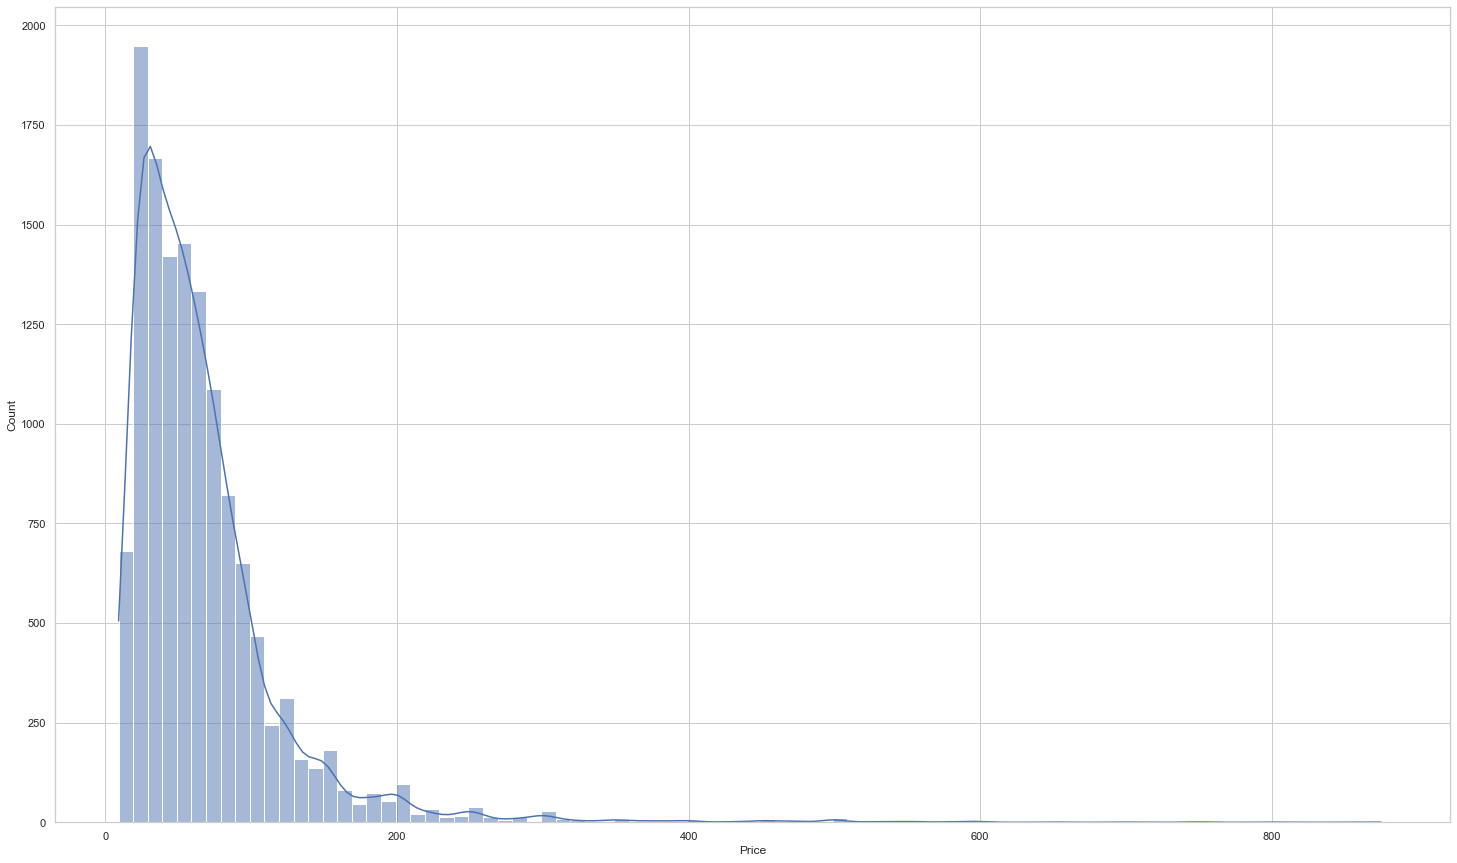

In [10]:
sns.histplot(data=df_madrid, x="Price", binwidth=10, kde=True)
plt.show()

**El precio tiene una distribución escorada a la izquierda ('positive skewness') y bastante pico ('positive kurtosis')**

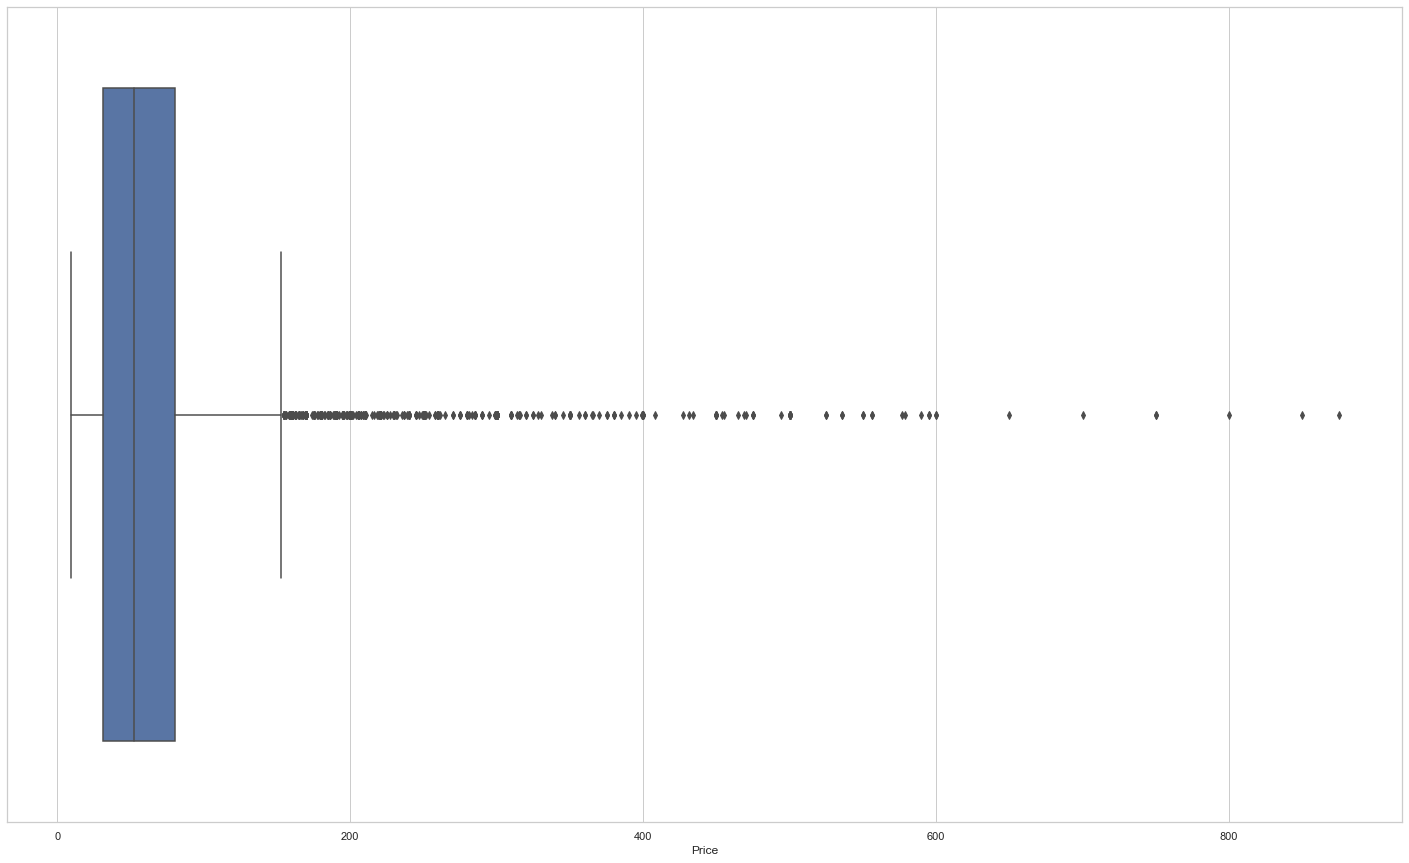

In [11]:
sns.boxplot(x=df_madrid["Price"])
plt.show()

In [12]:
df_madrid['Log Price'] = df_madrid['Price'].apply(lambda x: np.log(x))

In [13]:
df_madrid['Log Price'].describe()

count    13198.000000
mean         3.952655
std          0.668585
min          2.197225
25%          3.433987
50%          3.951244
75%          4.382027
max          6.774224
Name: Log Price, dtype: float64

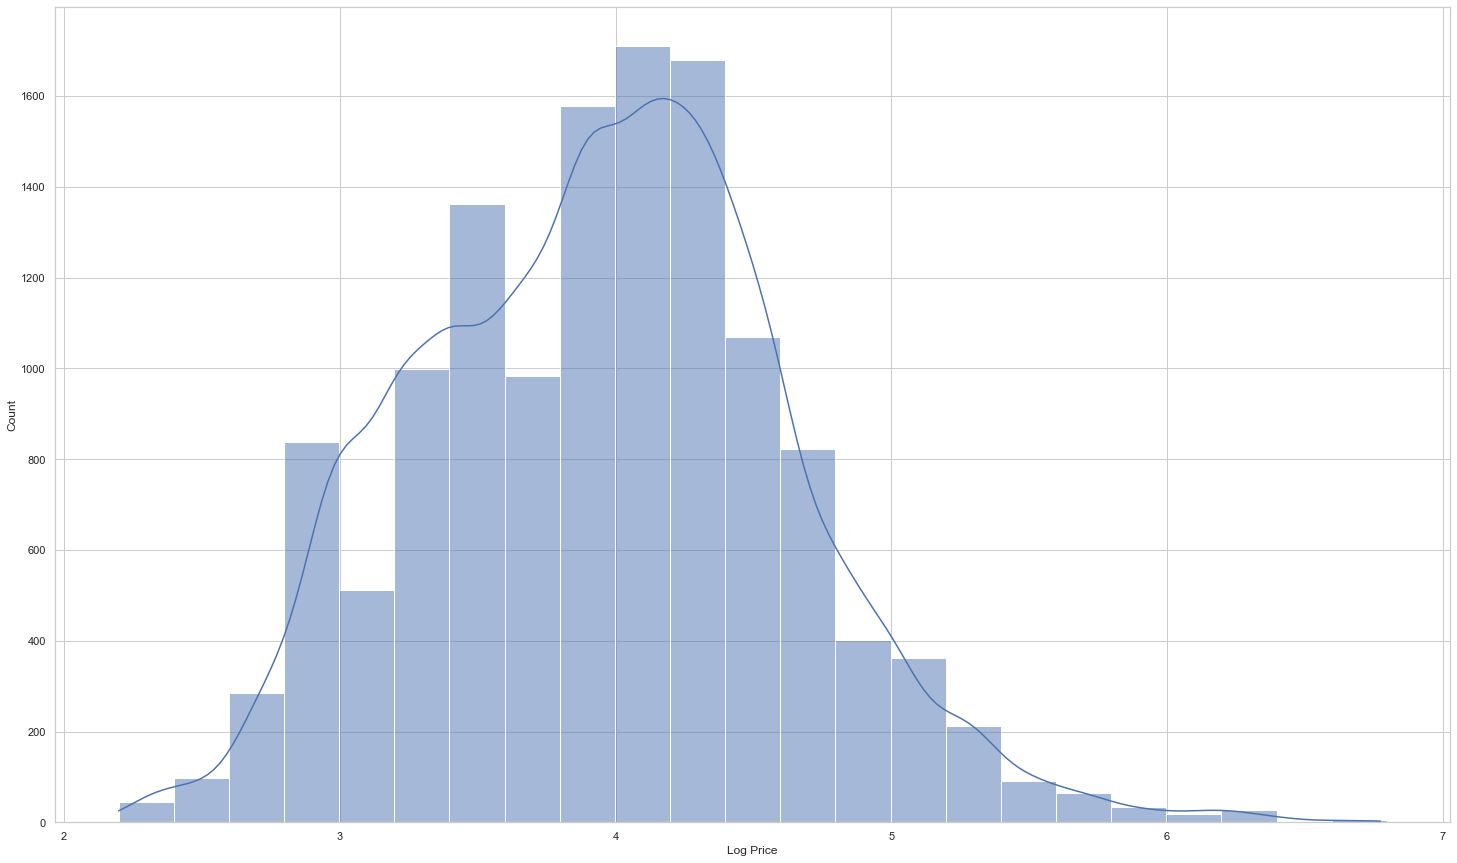

In [14]:
sns.histplot(data=df_madrid, x="Log Price", binwidth=0.2, kde=True)
plt.show()

**La distribución del logaritmo del precio se asemeja más a una distribución normal. Hay que tenerlo en cuenta de cara a una posible transformación de la target para la predicción**

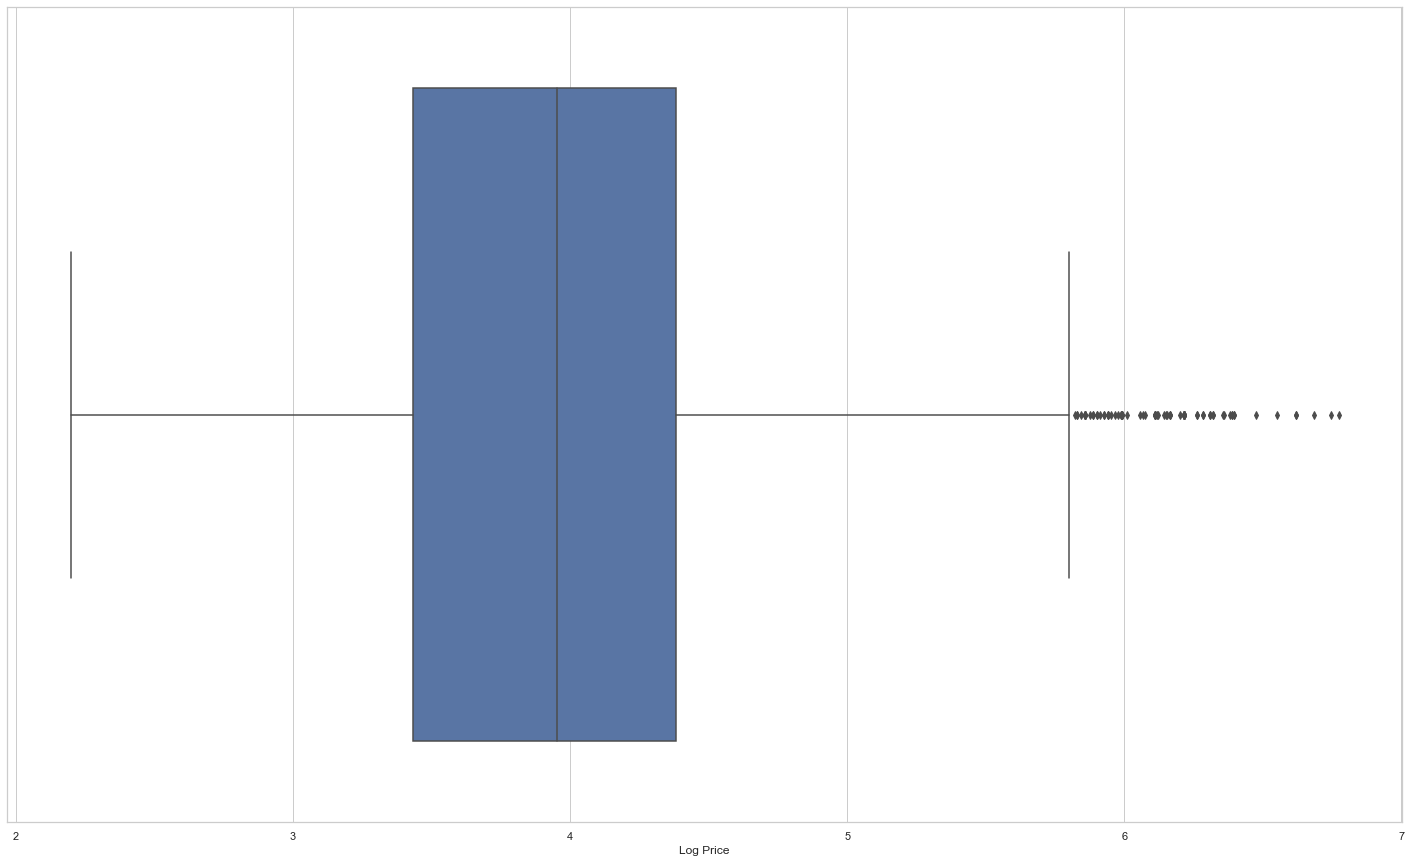

In [15]:
sns.boxplot(x=df_madrid["Log Price"])
plt.show()

### 'ID'

In [16]:
df_madrid['ID'].unique()

array([ 3150371,  3378181,  2070750, ...,   707670, 13648498,   868025])

In [17]:
df_madrid['ID'].describe()

count    1.320700e+04
mean     1.039842e+07
std      5.506713e+06
min      1.862800e+04
25%      5.820744e+06
50%      1.153910e+07
75%      1.533407e+07
max      1.810984e+07
Name: ID, dtype: float64

**DROP**

### 'Listing Url'

In [18]:
df_madrid['Listing Url'].unique()

array(['https://www.airbnb.com/rooms/3150371',
       'https://www.airbnb.com/rooms/3378181',
       'https://www.airbnb.com/rooms/2070750', ...,
       'https://www.airbnb.com/rooms/707670',
       'https://www.airbnb.com/rooms/13648498',
       'https://www.airbnb.com/rooms/868025'], dtype=object)

In [19]:
df_madrid['Listing Url'].describe()

count                                    13207
unique                                   13207
top       https://www.airbnb.com/rooms/3150371
freq                                         1
Name: Listing Url, dtype: object

**DROP**

### 'Scrape ID'

In [20]:
df_madrid['Scrape ID'].unique()

array([20170407214119])

In [21]:
df_madrid['Scrape ID'].describe()

count    1.320700e+04
mean     2.017041e+13
std      4.871278e+00
min      2.017041e+13
25%      2.017041e+13
50%      2.017041e+13
75%      2.017041e+13
max      2.017041e+13
Name: Scrape ID, dtype: float64

**DROP**

### 'Last Scraped'

In [22]:
df_madrid['Last Scraped'].unique()

array(['2017-04-08'], dtype=object)

In [23]:
df_madrid['Last Scraped'].describe()

count          13207
unique             1
top       2017-04-08
freq           13207
Name: Last Scraped, dtype: object

**DROP**

### 'Name'

In [24]:
df_madrid['Name'].unique()

array(['Double room + bathroom - La Latina',
       'Ópera/Plz Mayor -- A/C, elevator', 'Centric room with a balcony',
       ..., 'centro (Chueca-Argüelles) 2rooms',
       'Central flat with pool, gym & sauna -Gran Vía XIII',
       'Big and sunny room in the centre'], dtype=object)

In [25]:
df_madrid['Name'].describe()

count                                  13207
unique                                 12836
top       Apartamento en el centro de Madrid
freq                                      12
Name: Name, dtype: object

**FEATURE ENGINEERING** --> Idioma,  Longitud, NLP, Palabras vinculadas a mayor precio

### 'Summary'

In [26]:
df_madrid['Summary'].unique()

array(['Double room with own bathroom in La Latina, in the heart of Madrid.',
       "Old world charm meets modern comfort in our newly-renovated, non-smoking 1-BR apartment with a/c in an elevator building in one of Madrid's grandest neighborhoods. Steps from Plaza Mayor, Ópera, royal palace, shopping, and major subway hubs.",
       "Lominous room for rent in the heart of the old Madrid (see location), between La Latina and Puerta de Toledo metro stations, is also very near Tirso de Molina. It's situated in the best tapa´s zone of the city but in a quite street.",
       ...,
       'El apartamento está en el corazón de Madrid, es muy silencioso, cómodo y confortable.',
       'With a fantastic location just off the vibrant Gran Via avenue in Madrid’s city centre, this two bedroom apartment is a great choice for those looking to immerse themselves in inner-city life.',
       'Big room for rent,  with a balcony. With furniture, 135cm Bed. Not smoking. I have a nice cat. Very central 

In [27]:
df_madrid['Summary'].describe()

count                                                 12719
unique                                                11951
top       Unique apartment in vibrant neighborhoods, car...
freq                                                     22
Name: Summary, dtype: object

**FEATURE ENGINEERING** --> Idioma,  Longitud, NLP, Palabras vinculadas a mayor precio

### 'Space'

In [28]:
df_madrid['Space'].unique()

array(["The apartment is spacious and cozy. It is 90 m2, it has a terrace, 2 rooms, 2 baths, kitchen and lounge. The building has 2 elevators and doorman. The room is double (1 ó 2 guests), 11 m2, exterior, with natural light and the bathroom (4'5 m2) has everything  you need for your stay (toothpaste, shampoo, gel...). In addition we offer towels and sheets. The apartment is always clean and tidy in order that we can have a harmonious living space and you feel like you are in your own home.",
       'Designed with the traveler in mind, our one-bedroom apartment in an elevator building (dating to 1850) is in the heart of Madrid -- the perfect place to call home during your visit.   2014 floor-to-ceiling renovations include fully-equipped kitchen; air conditioning and plentiful heating; dishwasher; washer and dryer; bathroom facilities with separate shower, water closet, and wash basin (virtually eliminates bathroom hogging); ample built-in closet space; bedroom with double bed; living/

In [29]:
df_madrid['Space'].describe()

count                                                  9645
unique                                                 8984
top       Los Apartamentos Good Stay Prado se encuentran...
freq                                                     29
Name: Space, dtype: object

### 'Description'

In [30]:
df_madrid['Description'].unique()

array(["Double room with own bathroom in La Latina, in the heart of Madrid. The apartment is spacious and cozy. It is 90 m2, it has a terrace, 2 rooms, 2 baths, kitchen and lounge. The building has 2 elevators and doorman. The room is double (1 ó 2 guests), 11 m2, exterior, with natural light and the bathroom (4'5 m2) has everything  you need for your stay (toothpaste, shampoo, gel...). In addition we offer towels and sheets. The apartment is always clean and tidy in order that we can have a harmonious living space and you feel like you are in your own home. You can use the kitchen, the lounge, the terrace, washing machine, etc.  always keeping the common areas clean and tidy. We have wifi so you are able to connect during your stay. The bedrooms are totally separated: one at one end of the house, the other at the other end. So, you will have the intimacy that you need. La Latina is one of the most famous neighbourhoods in Madrid, very central and near the most tourist areas of the cap

In [31]:
df_madrid['Description'].describe()

count                                                 13201
unique                                                12771
top       Es un piso con 6 habitaciones de las que 5  ha...
freq                                                     19
Name: Description, dtype: object

### 'Experiences Offered'

In [32]:
df_madrid['Experiences Offered'].unique()

array(['none'], dtype=object)

In [33]:
df_madrid['Experiences Offered'].describe()

count     13207
unique        1
top        none
freq      13207
Name: Experiences Offered, dtype: object

### 'Neighborhood Overview'

In [34]:
df_madrid['Neighborhood Overview'].unique()

array(['La Latina is one of the most famous neighbourhoods in Madrid, very central and near the most tourist areas of the capital. From the house you are walking distance to the Cathedral of The Almudena, The Royal palace, Sabatini\'s Gardens, The Plaza Mayor.  The area is also very well known for being meeting point to enjoy the terraces, to have tapas, to have a few "cañas" and to visit the sunday Rastro market.  Still, being central, La Latina is a neighborhood full of squares and parks: you only have to go down our street if you want to take a walk or do some exercise by Madrid Rio.',
       'The neighborhood is steeped in history and close to what was the original city wall. You\'re surrounded by Madrid\'s oldest structures.  The area ("Ópera") is the epitome of Madrid\'s magical charm: the dichotomy of a vibrant, modern European city and a deeply Mediterranean culture that honors life balance and enjoyment of simple pleasures.',
       '-', ...,
       'If you are traveling to Ma

In [35]:
df_madrid['Neighborhood Overview'].describe()

count                                                  8269
unique                                                 7152
top       Se trata de una de las zonas más emblemáticas ...
freq                                                     32
Name: Neighborhood Overview, dtype: object

### 'Notes'

In [36]:
df_madrid['Notes'].unique()

array([nan, '-',
       "Right now we don't have an elevator although we have permission to install one. Work should start on it by the end of 2015.",
       ...,
       'Me encantaría poder ayudar a que vuestra estancia en Madrid sea perfecta. Cualquier cosa que necesiteis, no dudeis en consultarme.',
       'The after stay cleanig of the house is included in the price, if everything is in order, as usual. Please use the public waste collection service. Everyday from 20:00 on the bucket located at the front door. We provide individual towels, soap, toilet paper, new scourer and dishcloth, and other things to make your stay more confortable.',
       'Included in price:     - Utilities     - High Speed Internet and TV     - Taxes Not included in price:     - € 70 Booking Fee     - 3% Surcharge for Payments with American Express (No Surcharges for Visa or Mastercard(URL HIDDEN)15 /day for up to 4 people. (The price shown is for max. 2 people) We ask our clients to pay a refundable secur

In [37]:
df_madrid['Notes'].describe()

count                                                  5006
unique                                                 4090
top       Check in time is at 3pm or later, although som...
freq                                                     53
Name: Notes, dtype: object

### 'Transit'

In [38]:
df_madrid['Transit'].unique()

array(['The closest tube station is La Latina (line 5 - green), 7 min by foot.   Sol, Opera and Tirso de Molina are also very close.',
       'The apartment is close to the Ópera metro station (Lines 2 and 5) and less than 10 minutes on foot from the major metro hub at Puerta del Sol (Lines 1, 2, 3, and suburban Cercanías rail).',
       '-', ...,
       'A number of transport links are within easy walking distance, meaning guests can explore the rest of the city and beyond.',
       'You will be located in the area of Plaza de San Ildefonso, the "heart" of the vibrant district of Malasaña. Your closest metro stations are: Tribunal (line 1 and 10), 4 minutes walk, and Noviciado (line 2), 5 minutes walk. These are some of the many points of interest in the city: Callao (Gran Via): 7 minutes walk. Puerta del Sol: 12 minutes walk. Plaza Mayor: 11 minutes walk. Museo del Prado: 13 minutes walk. Parque del Retiro: 12 minutes walk.',
       'From here you can walk to most places in the cente

In [39]:
df_madrid['Transit'].describe()

count                                                  8220
unique                                                 7093
top       It is calm, quite zone and you don’t have to s...
freq                                                     41
Name: Transit, dtype: object

### 'Access'

In [40]:
df_madrid['Access'].unique()

array(['You can use the kitchen, the lounge, the terrace, washing machine, etc.  always keeping the common areas clean and tidy. We have wifi so you are able to connect during your stay.',
       'The entire apartment is yours.', '-', ...,
       'Surface area: 78 m². Third floor. The living/dining room is furnished with a three-seater sofa bed (1,40m x 1,90m), two armchairs, a wooden coffee table, an elegant standing lamp and a side table. In addition, there is a plasma TV and a wireless speaker. The dining area has a table with seats for up to four people and standing lamp. The kitchen is fully equipped and is hidden behind a system of doors and it can be fully concealed when not in use. The bedroom comes complete with a double bed (1,40m x 1,90m), two bedside tables, built-in closets with light at the bottom and en-suite bathroom with a walk-in shower and separate loo. The second bathroom has walk-in shower. The entire apartment has wooden floors, except for the bathrooms, which are

In [41]:
df_madrid['Access'].describe()

count                                                  7502
unique                                                 6385
top       Wifi, TV, washing machine, Microwave, full equ...
freq                                                     55
Name: Access, dtype: object

### 'Interaction'

In [42]:
df_madrid['Interaction'].unique()

array(['The bedrooms are totally separated: one at one end of the house, the other at the other end. So, you will have the intimacy that you need.',
       'We are always available to answer questions and make recommendations in English and Spanish. If in-person attention is needed for any reason, we live less than a 10-minute walk away.',
       '-', ...,
       "At your arrival Noe will explain you how everything works. And we 'll be at your disposal for any question or help. You'll have a Nespresso coffe machine an a welcome coffe.",
       'The relationship will be full as long as they need it.',
       'I work most at home, so I will be available for informacion.'],
      dtype=object)

In [43]:
df_madrid['Interaction'].describe()

count                                                  7485
unique                                                 5980
top       We will arrange the check in time depending on...
freq                                                     66
Name: Interaction, dtype: object

### 'House Rules'

In [44]:
df_madrid['House Rules'].unique()

array(['Care and respect are both required in the common and private spaces. The house has a calm atmosphere where we can all feel good.  We are moderate smokers, so certainly you can smoke in the house.',
       "The Golden Rule shall apply always :) The apartment has been in Miguel's family for generations, so the comportment of our guests reflects on Miguel and his family. Residents of the building are a diverse roster of young families, senior citizens, and professionals. Please be a kind and considerate neighbor, keeping noise levels to a minimum, particularly in the evening and overnight hours. We would prefer that the apartment not be used as a party space or to host large gatherings. Before departure, kindly make sure that any dishes you have used are cleaned and placed back into their respective cabinets. Also make sure that the lights, temperature control panels (one in the living room and one in the bedroom) and air conditioners are switched off. If something breaks, please 

In [45]:
df_madrid['House Rules'].describe()

count                                                  8559
unique                                                 7147
top       Checkin is done at our office. The address: Ca...
freq                                                     81
Name: House Rules, dtype: object

### 'Thumbnail Url' - 'Medium Url' - 'XL Picture Url' - 'Picture URL'

In [46]:
df_madrid['Thumbnail Url'].unique()

array(['https://a0.muscache.com/im/pictures/40713802/33eb3411_original.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/44239584/c11cd625_original.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/84378550/fa2dbe0d_original.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/20174832/85e98f09_original.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/e416b03c-c35f-419c-92cf-c178ece4b440.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/13513390/44a59156_original.jpg?aki_policy=small'],
      dtype=object)

In [47]:
df_madrid['Thumbnail Url'].describe()

count                                                 10729
unique                                                10726
top       https://a0.muscache.com/im/pictures/4fb56b8a-2...
freq                                                      3
Name: Thumbnail Url, dtype: object

In [48]:
df_madrid[['Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']].head()

,Thumbnail Url,Medium Url,Picture Url,XL Picture Url
3,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/40713802/3...
4,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/44239584/c...
5,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/84378550/f...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/84378550/f...
6,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/be441d1f-4...
7,https://a0.muscache.com/im/pictures/c232f016-f...,https://a0.muscache.com/im/pictures/c232f016-f...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/c232f016-f...


In [49]:
df_madrid[['Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']].isnull().sum()

Thumbnail Url     2478
Medium Url        2478
Picture Url         29
XL Picture Url    2478
dtype: int64

### 'Host ID'

In [50]:
df_madrid['Host ID'].unique()

array([ 11902716,    809083,   7005367, ..., 110865319,  61033459,
         4570171])

In [51]:
df_madrid['Host ID'].describe()

count    1.320700e+04
mean     3.732851e+07
std      3.431321e+07
min      1.745300e+04
25%      7.682962e+06
50%      2.734185e+07
75%      5.733305e+07
max      1.247534e+08
Name: Host ID, dtype: float64

### 'Host Url'

In [52]:
df_madrid['Host URL'].unique()

array(['https://www.airbnb.com/users/show/11902716',
       'https://www.airbnb.com/users/show/809083',
       'https://www.airbnb.com/users/show/7005367', ...,
       'https://www.airbnb.com/users/show/110865319',
       'https://www.airbnb.com/users/show/61033459',
       'https://www.airbnb.com/users/show/4570171'], dtype=object)

In [53]:
df_madrid['Host URL'].describe()

count                                          13207
unique                                          8082
top       https://www.airbnb.com/users/show/21514948
freq                                             145
Name: Host URL, dtype: object

### 'Host Name'

In [54]:
df_madrid['Host Name'].unique()

array(['Daniel Y Ximena', 'Michael', 'Sergio', ..., 'Mathieu', 'Pedro J',
       'Raco'], dtype=object)

In [55]:
df_madrid['Host Name'].describe()

count      13204
unique      2930
top       Raquel
freq         214
Name: Host Name, dtype: object

In [56]:
df_madrid[['ID','Host Name']].groupby(by=['Host Name'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Host Name,
Raquel,214
Javier,209
Ana,189
Maria,188
Carlos,156
David,136
Miguel,123
Laura,109
Juan,103


### 'Host Since'

In [57]:
df_madrid['Host Since'].unique()

array(['2014-02-03', '2011-07-12', '2013-06-19', ..., '2013-11-25',
       '2013-09-26', '2012-08-26'], dtype=object)

In [58]:
df_madrid['Host Since'].describe()

count          13204
unique          2057
top       2014-09-19
freq             148
Name: Host Since, dtype: object

In [59]:
df_madrid[['ID','Host Since']].groupby(by=['Host Since'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Host Since,
2014-09-19,148
2014-05-08,105
2016-01-12,87
2012-09-14,79
2017-02-23,72
2011-11-15,56
2015-04-07,56
2016-02-23,54
2015-02-10,52


In [60]:
df_madrid['Last Scraped'].unique()

array(['2017-04-08'], dtype=object)

### 'Host Location'

In [61]:
df_madrid['Host Location'].unique()

array(['Madrid, Community of Madrid, Spain', 'Madrid, Madrid, Spain',
       'Region of Murcia, Spain',
       'Majadahonda, Community of Madrid, Spain', 'ES',
       'Vitoria-Gasteiz, Basque Country, Spain',
       'Paris, Île-de-France, France', 'Granada, Andalusia, Spain',
       'San Martín de la Vega, Comunidad de Madrid, Spain',
       'Madrid, SP, Spain', 'Cluj-Napoca, Cluj County, Romania',
       'Alcobendas, Community of Madrid, Spain',
       'Galapagar, Comunidad de Madrid, Spain', 'US', 'Spain',
       'Cartagena, Región de Murcia, Spain',
       'Las Rozas, Community of Madrid, Spain',
       'Boadilla del Monte, Comunidad de Madrid, Spain',
       'Sydney, New South Wales, Australia',
       'Santiago, Santiago Metropolitan Region, Chile',
       'Martínez, Buenos Aires Province, Argentina', 'Switzerland',
       'Santa Coloma de Gramenet, Catalunya, Spain',
       'El Molar, Comunidad de Madrid, Spain', 'Deutschland',
       'Las Palmas de Gran Canaria, Canary Islands, 

In [62]:
df_madrid['Host Location'].describe()

count                                  13165
unique                                   503
top       Madrid, Community of Madrid, Spain
freq                                    8957
Name: Host Location, dtype: object

In [63]:
df_madrid[['ID','Host Location']].groupby(by=['Host Location'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Host Location,
"Madrid, Community of Madrid, Spain",8957
ES,1345
"Madrid, Madrid, Spain",1294
Spain,131
"Pozuelo de Alarcón, Comunidad de Madrid, Spain",70
"Barcelona, Catalonia, Spain",67
US,63
NaN,42
España,39


### 'Host About'

In [64]:
df_madrid['Host About'].unique()

array(['Aficionados al cine, la música, los amigos, el barrio... Ambos venimos del mundo audiovisual y nos gusta vivir una vida tranquila.\r\nCualquier pregunta, no dudes en contactarnos.\r\nEstaremos encantados de recibirte en casa.\r\nSaludos!',
       "I'm a US expat who enjoys welcoming people from around the world. I respect guest privacy but also welcome guests to join for libations and good conversation.\r\n\r\nI was raised in a cow town south of Buffalo, NY, lived in NYC for 20 years and just outside NYC in South Norwalk, CT for the three years prior to my big leap to Spain. I moved to Madrid in January, 2011. I go back to the US frequently for business and to visit friends and family.\r\n\r\nMy schooling was in music (MM from Manhattan School of Music); I specialize in branding and communications, mostly for companies in Silicon Valley or otherwise in the tech sector. I was with MTV Networks in NYC for 13 years, where my last position was VP Digital for the cable networks Nick

In [65]:
df_madrid['Host About'].describe()

count                                                  8235
unique                                                 4392
top       Me llamo Raquel, y formo parte del equipo de F...
freq                                                    145
Name: Host About, dtype: object

### Host Response Time

In [66]:
df_madrid['Host Response Time'].unique()

array(['within a day', 'within an hour', 'within a few hours', nan,
       'a few days or more'], dtype=object)

In [67]:
df_madrid['Host Response Time'].describe()

count              11552
unique                 4
top       within an hour
freq                7107
Name: Host Response Time, dtype: object

In [68]:
df_madrid[['ID','Host Response Time']].groupby(by=['Host Response Time']).count().sort_values(by='ID', ascending=False)

,ID
Host Response Time,
within an hour,7107
within a few hours,2654
within a day,1522
a few days or more,269


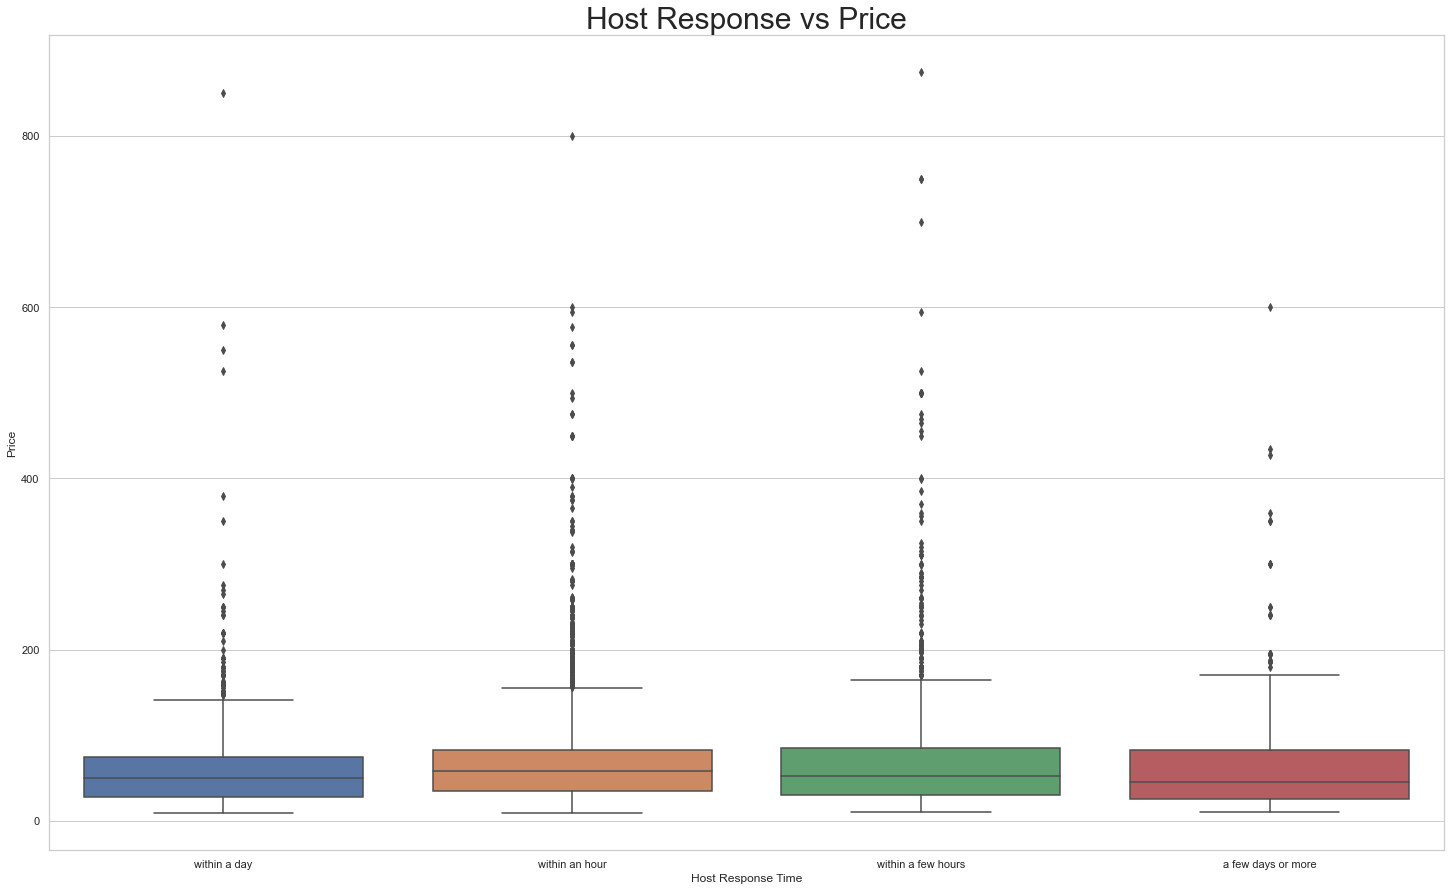

In [69]:
sns.boxplot(x='Host Response Time', y="Price", data=df_madrid)
plt.title('Host Response vs Price', size= 30)
plt.show()

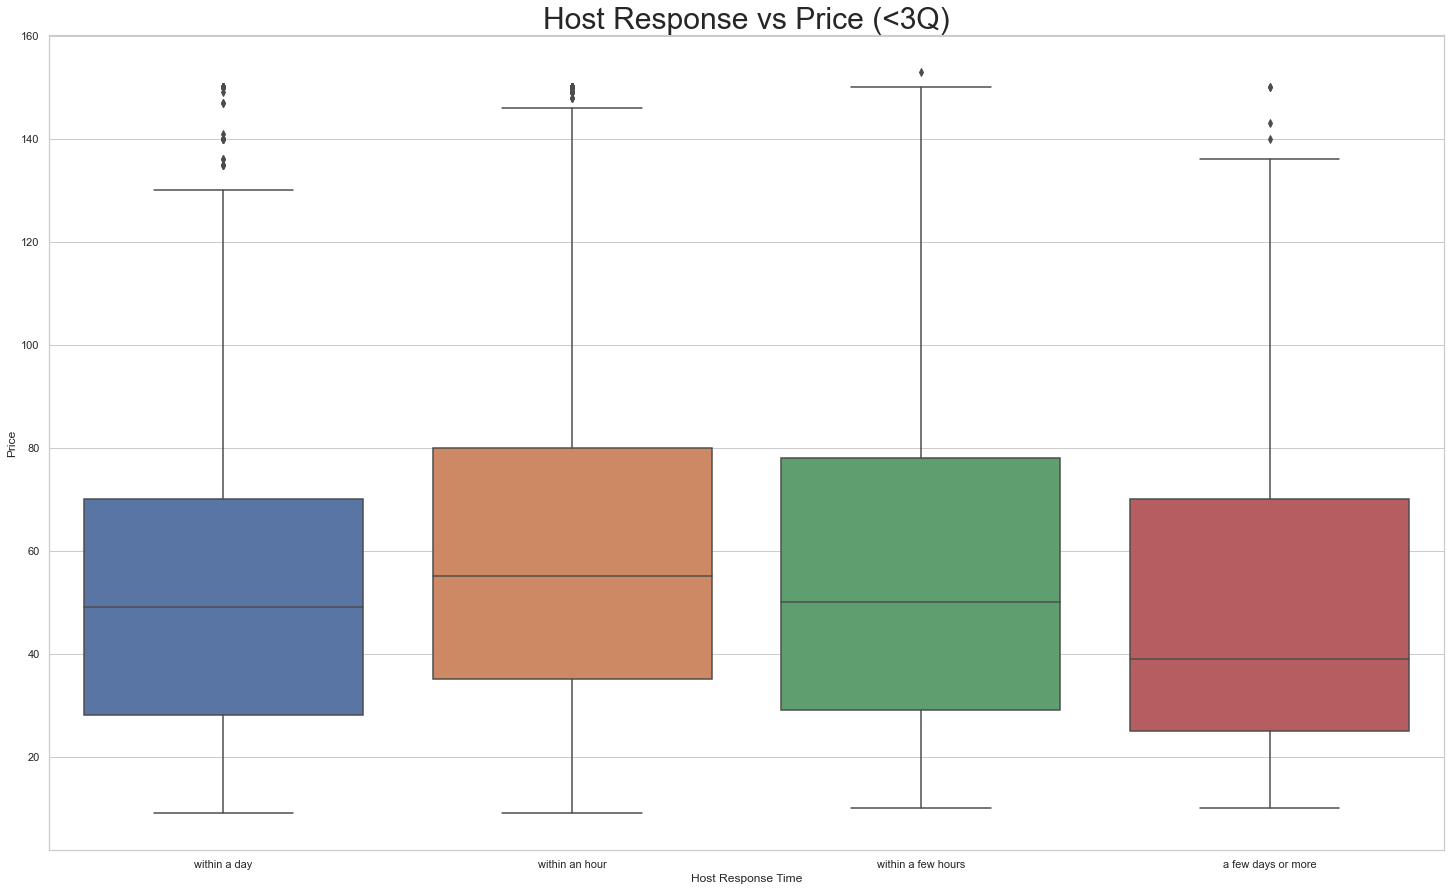

In [70]:
sns.boxplot(x='Host Response Time', y="Price", data=df_madrid[df_madrid['Price']<155])
plt.title('Host Response vs Price (<3Q)', size= 30)
plt.show()

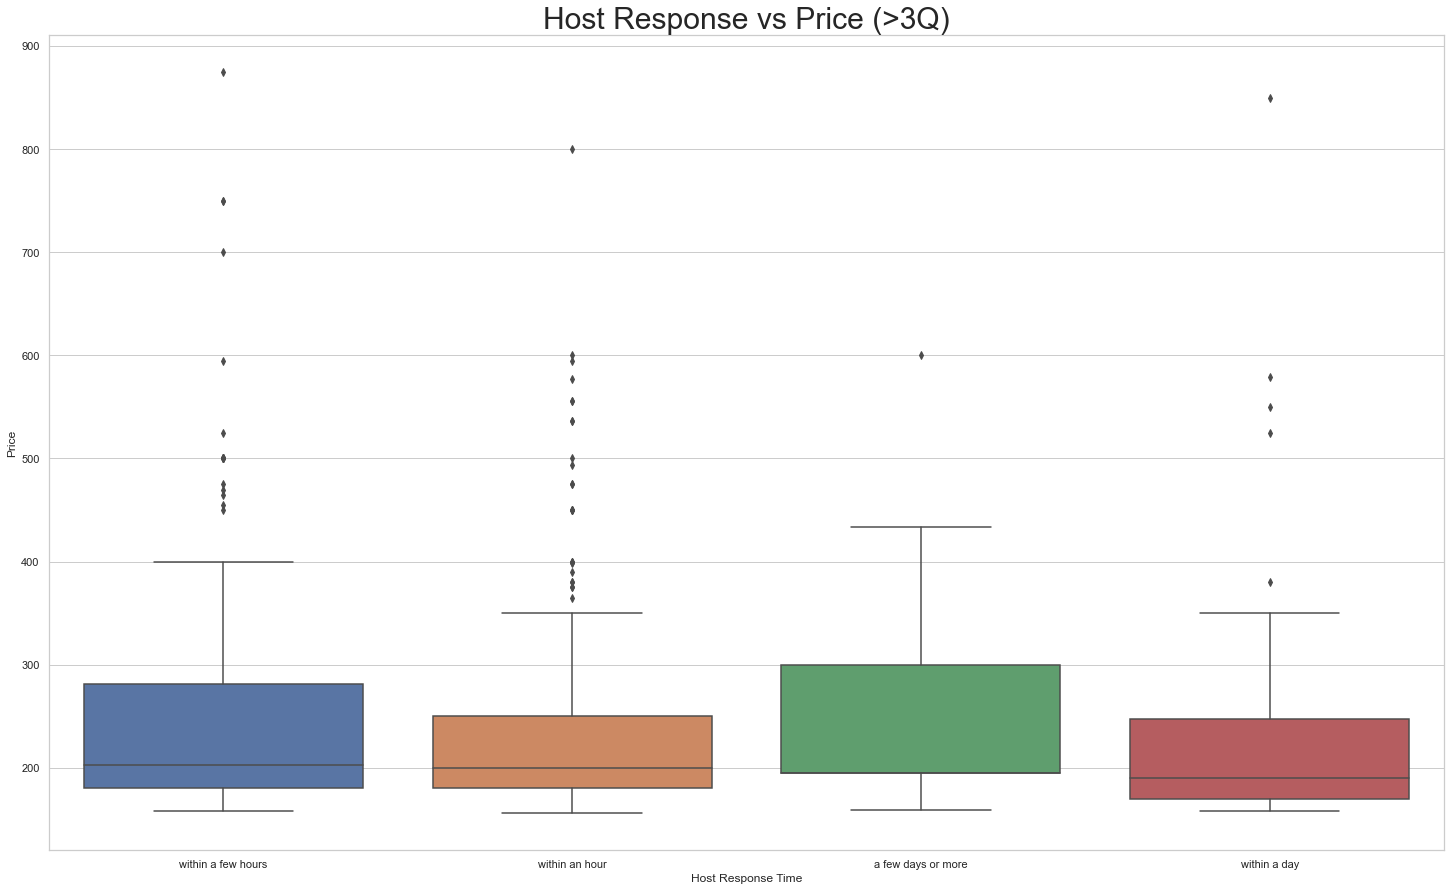

In [71]:
sns.boxplot(x='Host Response Time', y="Price", data=df_madrid[df_madrid['Price']>155])
plt.title('Host Response vs Price (>3Q)', size= 30)
plt.show()

### 'Host Response Rate'

In [72]:
df_madrid['Host Response Rate'].unique()

array([100.,  94.,  80.,  97.,  78.,  nan,  76.,  40.,  98.,   0.,  75.,
        99.,  50.,  82.,  86.,  87.,  96.,  88.,  95.,  92.,  90.,  67.,
        83.,  91.,  70.,  57.,  25.,  71.,  93.,  33.,  89.,  79.,  29.,
        60.,  46.,   9.,  41.,  30.,  84.,  69.,  85.,  55.,  81.,  62.,
        43.,  73.,  72.,  61.,  65.,  74.,  11.,  44.,  42.,  35.,  63.,
        68.,  20.,  13.,  27.,  64.,  56.,  77.,  47.,  26.,  28.,  38.,
        54.,  59.,  24.])

In [73]:
df_madrid['Host Response Rate'].describe()

count    11552.000000
mean        94.824533
std         15.248518
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: Host Response Rate, dtype: float64

In [74]:
df_madrid[['ID','Host Response Rate']].groupby(by=['Host Response Rate']).count().sort_values(by='ID', ascending=False)

,ID
Host Response Rate,
100.0,8870
90.0,300
75.0,225
98.0,176
96.0,165
...,...
24.0,1
41.0,1
62.0,1


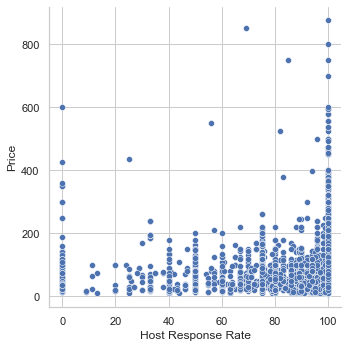

In [75]:
sns.relplot(data=df_madrid, x='Host Response Rate', y='Price')
plt.show()

In [76]:
df_madrid[['Host Response Rate','Price']].corr()

,Host Response Rate,Price
Host Response Rate,1.000000,-0.005816
Price,-0.005816,1.000000


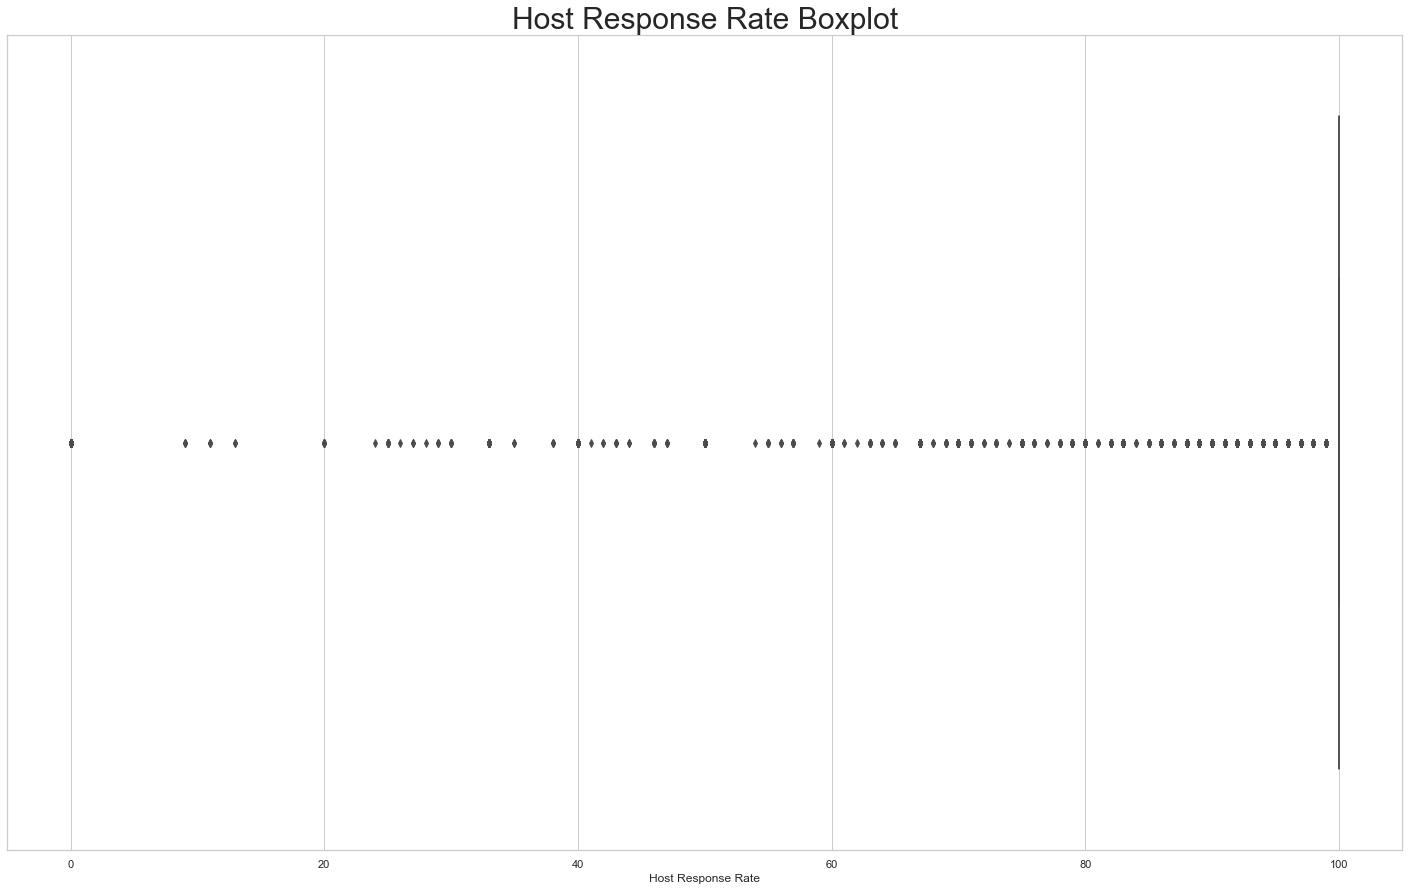

In [77]:
sns.boxplot(data=df_madrid, x='Host Response Rate')
plt.title('Host Response Rate Boxplot', size= 30)
plt.show()

### 'Host Acceptance Rate'

In [78]:
df_madrid['Host Acceptance Rate'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Host Acceptance Rate, dtype: object

### 'Host Thumbnail Url'

In [79]:
df_madrid['Host Thumbnail Url'].describe()

count                                                 13204
unique                                                 8039
top       https://a0.muscache.com/im/users/21514948/prof...
freq                                                    145
Name: Host Thumbnail Url, dtype: object

### 'Host Picture Url'

In [80]:
df_madrid['Host Picture Url'].describe()

count                                                 13204
unique                                                 8039
top       https://a0.muscache.com/im/users/21514948/prof...
freq                                                    145
Name: Host Picture Url, dtype: object

### 'Host Neighbourhood'

In [81]:
df_madrid['Host Neighbourhood'].unique()

array(['Palacio', 'La Latina', 'Chamberí', 'Justicia', 'Rios Rosas', nan,
       'Embajadores', 'Sol', 'Cortes', 'Malasaña', 'Argüelles',
       "L'Antiga Esquerra de l'Eixample", 'Aluche', 'Centro', 'Almagro',
       'Imperial', 'Trafalgar', 'Recoletos', 'Arganzuela', 'Acacias',
       'Moncloa', 'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Arapiles',
       'SS.Annuziata', 'La Chopera', 'Legazpi', 'Delicias',
       'Palos do Moguer', 'Prosperidad', 'Hispanoamérica', 'Nueva España',
       'Castilla', 'Bellas Vistas', 'Cuatro Caminos', "Da'an", 'Almenara',
       'Valdeacederas', 'Berruguete', 'Guindalera', 'Lista', 'Castellana',
       'El Viso', 'Goya', 'Fuente del Berro', 'Pacifico',
       'Vila de Gràcia', 'Adelfas', 'Ibiza', 'Jerónimos', 'Brentwood',
       'Fuencarral-el Pardo', 'Carabanchel', 'Puente de Vallecas',
       'Moratalaz', 'Villa de Vallecas', 'Vicálvaro', 'San Blas',
       'Barajas', 'Usera', 'Neukölln', 'Castillejos', 'Vallehermosa',
       'Gaztambide', "Dreta 

In [82]:
df_madrid['Host Neighbourhood'].describe()

count         9958
unique         109
top       Malasaña
freq          1001
Name: Host Neighbourhood, dtype: object

### 'Host Listings Count'

In [83]:
df_madrid['Host Listings Count'].unique()

array([  1.,   3.,   4.,  10., 114.,   6.,   8.,  20.,   2.,   9.,  12.,
       164.,   7.,  38.,  13.,  11., 142.,  35., 207.,  15.,  46.,  40.,
         5.,  57.,  24.,  32.,  51.,  14.,  16.,  23.,  17.,  30.,   0.,
        18.,  36.,  26.,  22.,  68.,  28.,  39.,  27.,  34.,  nan,  45.,
       136.,  21.,  50.,  25., 265.,  81.])

In [84]:
df_madrid['Host Listings Count'].describe()

count    13204.000000
mean         9.813769
std         27.577815
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        265.000000
Name: Host Listings Count, dtype: float64

In [85]:
df_madrid[['ID','Host Listings Count']].groupby(by=['Host Listings Count']).count().sort_values(by='ID', ascending=False).head()

,ID
Host Listings Count,
1.0,5695
2.0,2094
3.0,1129
4.0,707
5.0,404


In [86]:
df_madrid[['ID','Host Listings Count']].groupby(by=['Host Listings Count']).count().sort_values(by='ID', ascending=False).tail()

,ID
Host Listings Count,
35.0,4
27.0,3
50.0,1
81.0,1
265.0,1


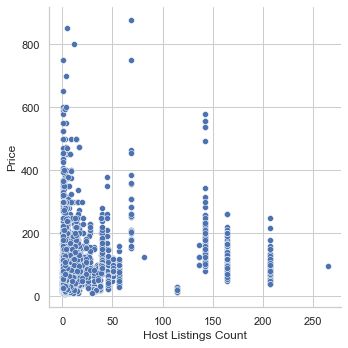

In [87]:
sns.relplot(data=df_madrid, x='Host Listings Count', y='Price')
plt.show()

In [88]:
df_madrid[['Host Listings Count','Price']].corr()

,Host Listings Count,Price
Host Listings Count,1.000000,0.188948
Price,0.188948,1.000000


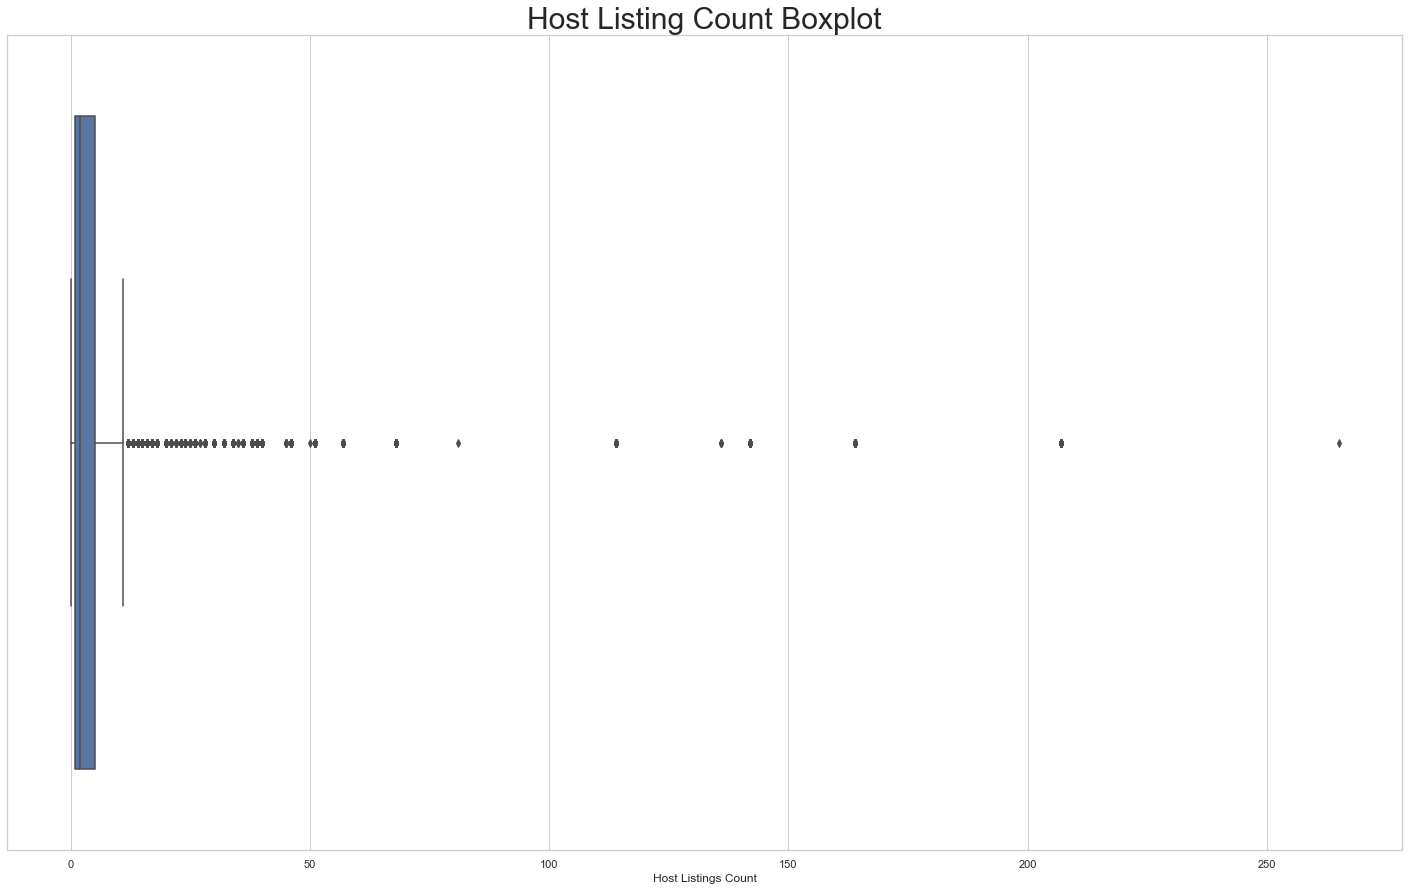

In [89]:
sns.boxplot(data=df_madrid, x='Host Listings Count')
plt.title('Host Listing Count Boxplot', size= 30)
plt.show()

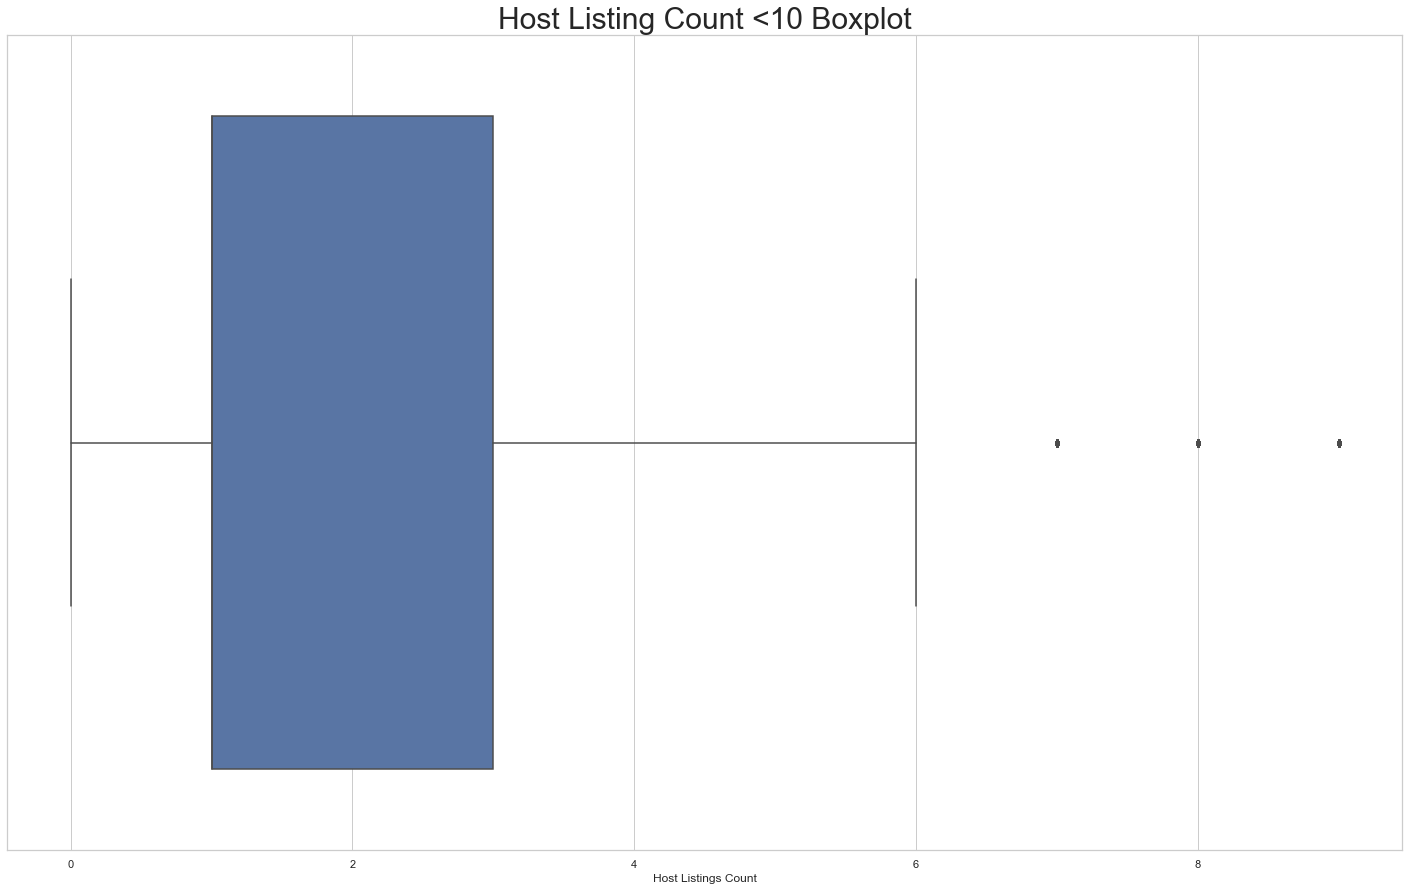

In [90]:
sns.boxplot(data=df_madrid[df_madrid['Host Listings Count']<10], x='Host Listings Count')
plt.title('Host Listing Count <10 Boxplot', size= 30)
plt.show()

### 'Host Total Listings Count'

In [91]:
df_madrid['Host Total Listings Count'].unique()

array([  1.,   3.,   4.,  10., 114.,   6.,   8.,  20.,   2.,   9.,  12.,
       164.,   7.,  38.,  13.,  11., 142.,  35., 207.,  15.,  46.,  40.,
         5.,  57.,  24.,  32.,  51.,  14.,  16.,  23.,  17.,  30.,   0.,
        18.,  36.,  26.,  22.,  68.,  28.,  39.,  27.,  34.,  nan,  45.,
       136.,  21.,  50.,  25., 265.,  81.])

In [92]:
df_madrid['Host Total Listings Count'].describe()

count    13204.000000
mean         9.813769
std         27.577815
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        265.000000
Name: Host Total Listings Count, dtype: float64

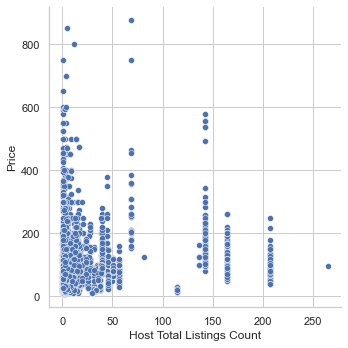

In [93]:
sns.relplot(data=df_madrid, x='Host Total Listings Count', y='Price')
plt.show()

In [94]:
df_madrid[['Host Total Listings Count','Price']].corr()

,Host Total Listings Count,Price
Host Total Listings Count,1.000000,0.188948
Price,0.188948,1.000000


### 'Host Verifications'

In [95]:
df_madrid['Host Verifications'].unique()

array(['email,phone,reviews,jumio',
       'email,phone,facebook,reviews,jumio,work_email',
       'email,phone,reviews,work_email',
       'email,phone,reviews,jumio,government_id',
       'email,phone,reviews,jumio,work_email', 'email,phone,reviews',
       'email,phone,reviews,jumio,offline_government_id,government_id',
       'email,phone,google,reviews,jumio,government_id',
       'email,phone,facebook,reviews,jumio', 'email,reviews',
       'email,phone,jumio', 'email,phone,facebook,reviews',
       'reviews,jumio',
       'email,phone,facebook,reviews,jumio,government_id',
       'email,phone,reviews,manual_offline',
       'email,phone,reviews,manual_offline,jumio,work_email',
       'email,phone,facebook,reviews,jumio,government_id,work_email',
       'email,phone,google,jumio,government_id',
       'email,phone,reviews,jumio,government_id,work_email',
       'email,facebook,reviews', 'email,phone',
       'email,phone,jumio,government_id',
       'email,phone,facebook,reviews

In [96]:
df_madrid['Host Verifications'].describe()

count                   13201
unique                    191
top       email,phone,reviews
freq                     3306
Name: Host Verifications, dtype: object

### 'Street'

In [97]:
df_madrid['Street'].unique()

array(['Palacio, Madrid, Community of Madrid 28005, Spain',
       'Palacio, Madrid, Community of Madrid 28013, Spain',
       'Madrid, Community of Madrid, Spain',
       'Malasaña, Madrid, Comunidad de Madrid, Spain',
       'Palacio, Madrid, Comunidad de Madrid 28013, Spain',
       'Embajadores, Madrid, Community of Madrid 28012, Spain',
       'Madrid, Community of Madrid 28012, Spain',
       'La Latina, Madrid, Comunidad de Madrid 28012, Spain',
       'Madrid, Comunidad de Madrid, Spain',
       'Embajadores, Madrid, Comunidad de Madrid 28012, Spain',
       'La Latina, Madrid, Comunidad de Madrid 28005, Spain',
       'Madrid, Comunidad de Madrid 28005, Spain',
       'Madrid, Comunidad de Madrid 28012, Spain',
       'La Latina, Madrid, Community of Madrid 28005, Spain',
       'Madrid, Comunidad de Madrid 28013, Spain',
       'Palacio, Madrid, Madrid 28013, Spain',
       'Palacio, Madrid, Comunidad de Madrid 28005, Spain',
       'Madrid, Community of Madrid 28013, Spain',

In [98]:
df_madrid['Street'].describe()

count                                                 13207
unique                                                  662
top       Embajadores, Madrid, Comunidad de Madrid 28012...
freq                                                    590
Name: Street, dtype: object

### 'Neighbourhood'

In [99]:
df_madrid['Neighbourhood'].unique()

array(['Palacio', 'La Latina', 'Malasaña', 'Embajadores', nan, 'Cortes',
       'Justicia', 'Sol', 'Acacias', 'Arganzuela', 'Ciudad Lineal',
       'Hortaleza', 'Villaverde', 'Arapiles', 'Trafalgar', 'Almagro',
       'La Chopera', 'Legazpi', 'Palos do Moguer', 'Prosperidad',
       'Hispanoamérica', 'Nueva España', 'Castilla', 'Bellas Vistas',
       'Cuatro Caminos', 'Almenara', 'Valdeacederas', 'Gaztambide',
       'Guindalera', 'Lista', 'Castellana', 'El Viso', 'Recoletos',
       'Goya', 'Fuente del Berro', 'Pacifico', 'Adelfas', 'Ibiza',
       'Jerónimos', 'Rios Rosas', 'Argüelles', 'Aluche', 'Carabanchel',
       'Puente de Vallecas', 'Moratalaz', 'Villa de Vallecas',
       'Vicálvaro', 'San Blas', 'Delicias', 'Barajas', 'Estrella',
       'Usera', 'Fuencarral-el Pardo', 'Castillejos', 'Vallehermosa',
       'Berruguete', 'Chamberí', 'Imperial', 'Atocha', 'Retiro',
       'Ciudad Jardin', 'El Tréntaiseis', 'Moncloa', 'Tetuán', 'Centro',
       'Fuencarral-El Pardo'], dtype=obj

In [100]:
df_madrid['Neighbourhood'].describe()

count         8753
unique          65
top       Malasaña
freq           894
Name: Neighbourhood, dtype: object

In [101]:
df_madrid[['ID','Neighbourhood']].groupby(by=['Neighbourhood']).count().sort_values(by='ID', ascending=False)


,ID
Neighbourhood,
Malasaña,894
La Latina,809
Embajadores,795
Sol,716
Justicia,556
...,...
Estrella,12
Retiro,11
Atocha,6


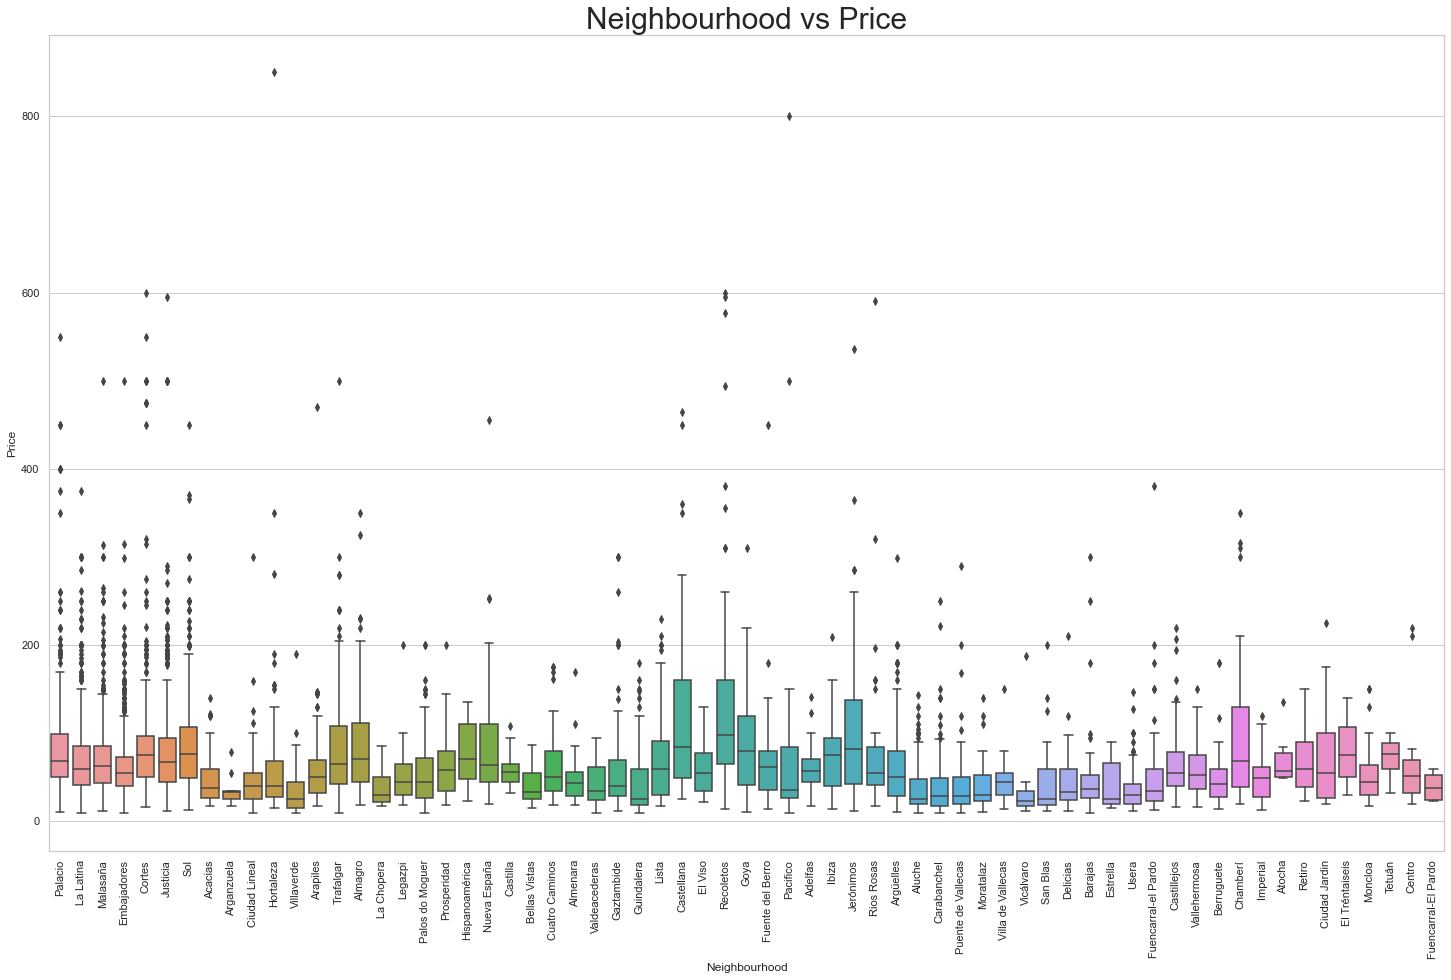

In [102]:
sns.boxplot(x='Neighbourhood', y="Price", data=df_madrid)
plt.title('Neighbourhood vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### 'Neighbourhood Cleansed'

In [103]:
df_madrid['Neighbourhood Cleansed'].unique()

array(['Palacio', 'Embajadores', 'Cortes', 'Justicia', 'Universidad',
       'Sol', 'Imperial', 'Acacias', 'Ventas', 'Pueblo Nuevo', 'Quintana',
       'Concepción', 'Canillas', 'Pinar del Rey', 'San Andrés',
       'Arapiles', 'Trafalgar', 'Almagro', 'Chopera', 'Legazpi',
       'Delicias', 'Palos de Moguer', 'Prosperidad', 'Hispanoamérica',
       'Nueva España', 'Castilla', 'Bellas Vistas', 'Cuatro Caminos',
       'Vallehermoso', 'Almenara', 'Valdeacederas', 'Berruguete',
       'Gaztambide', 'Guindalera', 'Lista', 'Castellana', 'El Viso',
       'Recoletos', 'Goya', 'Fuente del Berro', 'Atocha', 'Pacífico',
       'Adelfas', 'Estrella', 'Ibiza', 'Jerónimos', 'Rios Rosas',
       'Peñagrande', 'Argüelles', 'Puerta del Angel', 'Lucero', 'Aluche',
       'Campamento', 'Aguilas', 'Comillas', 'Vista Alegre', 'La Paz',
       'Valverde', 'Casa de Campo', 'Numancia', 'Puerta Bonita',
       'Buenavista', 'Abrantes', 'Moscardó', 'Entrevías', 'San Diego',
       'Palomeras Sureste', 'Fonta

In [104]:
df_madrid['Neighbourhood Cleansed'].describe()

count           13207
unique            125
top       Embajadores
freq             1844
Name: Neighbourhood Cleansed, dtype: object

In [105]:
df_madrid[['ID','Neighbourhood Cleansed']].groupby(by=['Neighbourhood Cleansed']).count().sort_values(by='ID', ascending=False)


,ID
Neighbourhood Cleansed,
Embajadores,1844
Universidad,1358
Palacio,1083
Sol,940
Justicia,785
...,...
Cuatro Vientos,3
El Plantío,3
Fuentelareina,3


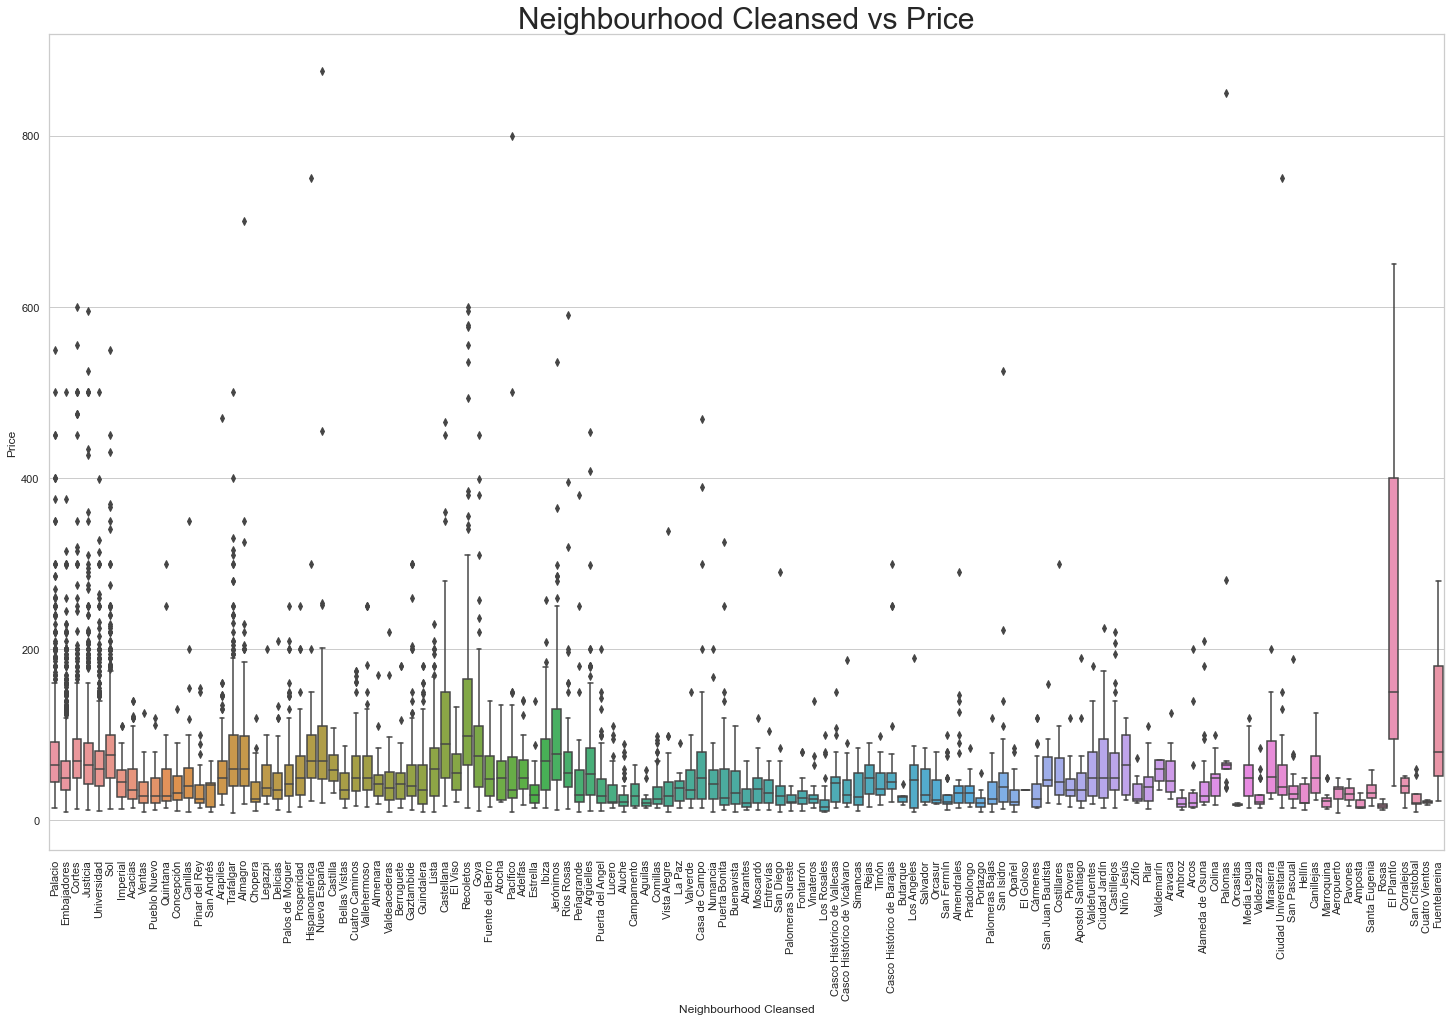

In [106]:
sns.boxplot(x='Neighbourhood Cleansed', y="Price", data=df_madrid)
plt.title('Neighbourhood Cleansed vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### 'Neighbourhood Group Cleansed'

In [107]:
df_madrid['Neighbourhood Group Cleansed'].unique()

array(['Centro', 'Arganzuela', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Chamberí', 'Chamartín', 'Tetuán', 'Salamanca', 'Retiro',
       'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Latina',
       'Carabanchel', 'Puente de Vallecas', 'Usera', 'Moratalaz',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas',
       'Barajas'], dtype=object)

In [108]:
df_madrid['Neighbourhood Group Cleansed'].describe()

count      13207
unique        21
top       Centro
freq        6760
Name: Neighbourhood Group Cleansed, dtype: object

In [109]:
df_madrid[['ID','Neighbourhood Group Cleansed']].groupby(by=['Neighbourhood Group Cleansed']).count().sort_values(by='ID', ascending=False)


,ID
Neighbourhood Group Cleansed,
Centro,6760
Chamberí,958
Salamanca,882
Arganzuela,789
Tetuán,457
Retiro,438
Moncloa - Aravaca,416
Latina,376
Chamartín,356


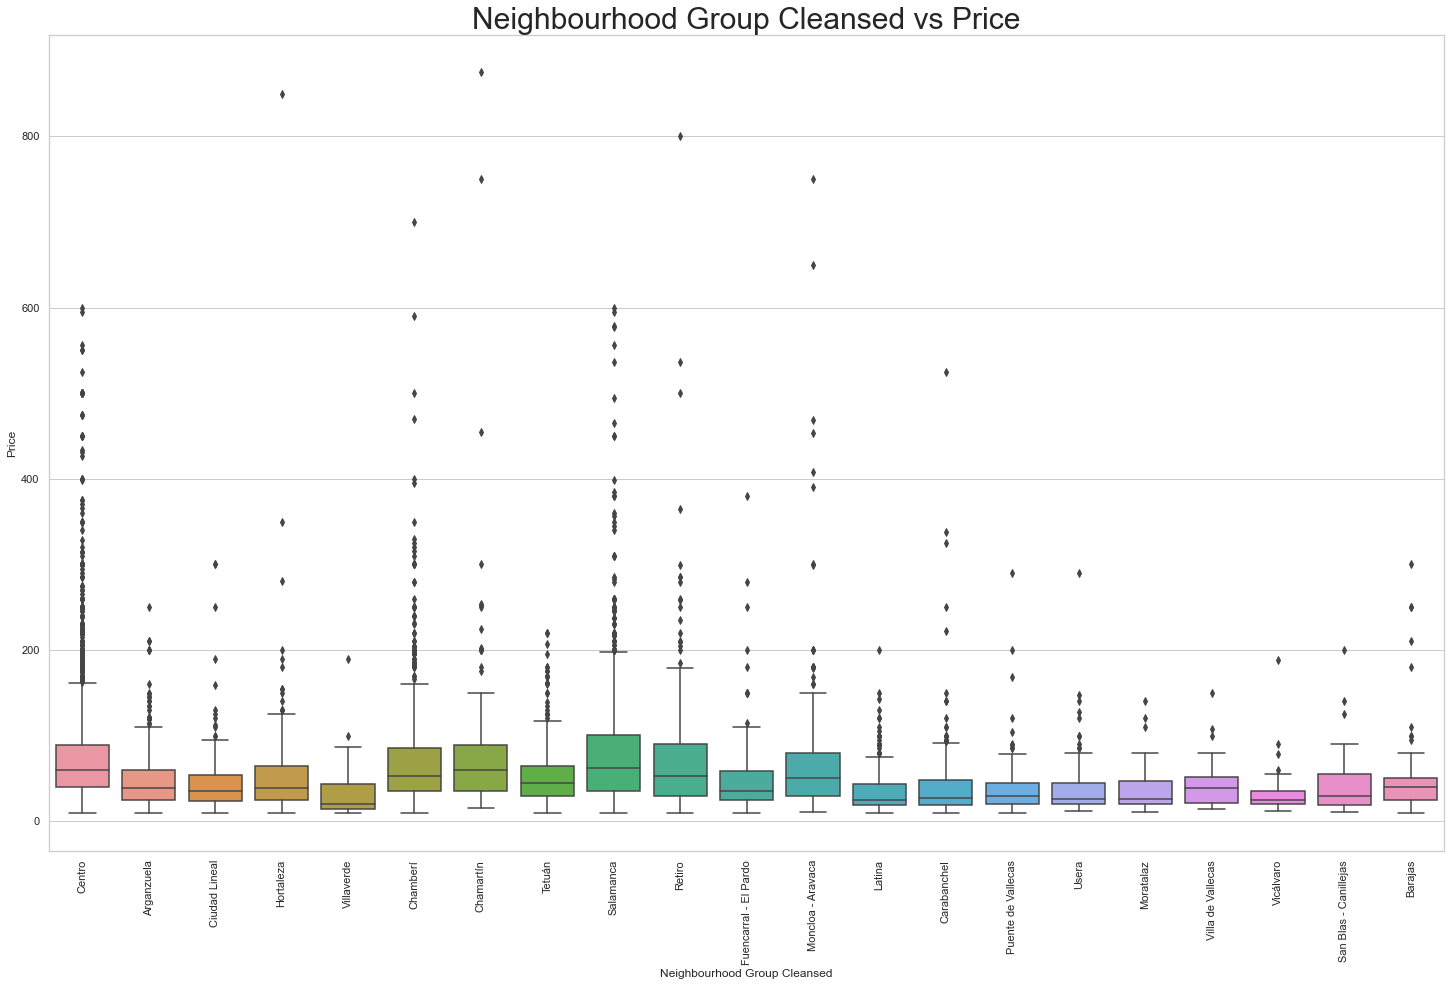

In [110]:
sns.boxplot(x='Neighbourhood Group Cleansed', y="Price", data=df_madrid)
plt.title('Neighbourhood Group Cleansed vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### 'City'

In [111]:
df_madrid['City'].unique()

array(['Madrid'], dtype=object)

In [112]:
df_madrid['City'].describe()

count      13207
unique         1
top       Madrid
freq       13207
Name: City, dtype: object

### 'State'

In [113]:
df_madrid['State'].unique()

array(['Community of Madrid', 'Comunidad de Madrid', 'Madrid', nan,
       'Communauté de Madrid', 'Spain', 'MADRID', 'España',
       'Autonome Gemeinschaft Madrid', 'Madrid capital', 'madrid', '28',
       'Madrid \nMadrid', 'Espańa', 'Usera', 'España,Madrid'],
      dtype=object)

In [114]:
df_madrid['State'].describe()

count                   13165
unique                     15
top       Comunidad de Madrid
freq                    10608
Name: State, dtype: object

### 'Zipcode'

In [115]:
df_madrid['Zipcode'].describe()

count     12768
unique       76
top       28012
freq       2060
Name: Zipcode, dtype: object

In [116]:
df_madrid['Zipcode'].unique()

array(['28005', '28013', nan, '28012', '28014', '28004', '28015', '28008',
       '28045', '28017', '28027', '28043', '28021', '28003', '28010',
       '28002', '28016', '28036', '28039', '28020', '28046', '28029',
       '28028', '28006', '28001', '28009', '28007', '28035', '28011',
       '28047', '28024', '28044', '28019', '28025', '28038', '28053',
       '28026', '28018', '28030', '28031', '28051', '28052', '28032',
       '28037', '28022', '28042', '28041', '28054', '28058', '28034',
       '28050', '28049', '28033', '28055', '27013', '28023', '28850',
       '28040', '20126', '28056', '28060', '2015', '27004', '-', '28',
       '2805', '25008', '20013', '28051\n28051', '280013', '28094',
       '28002\n28002', '2804', '2815', 'Madrid 28004', '28105', '28048'],
      dtype=object)

### 'Market'

In [117]:
df_madrid['Market'].describe()

count      13157
unique         5
top       Madrid
freq       13145
Name: Market, dtype: object

In [118]:
df_madrid['Market'].unique()

array(['Madrid', nan, 'Other (International)', 'Deauville', 'Toledo',
       'London'], dtype=object)

### 'Smart Location'

In [119]:
df_madrid['Smart Location'].describe()

count             13207
unique                2
top       Madrid, Spain
freq              13192
Name: Smart Location, dtype: object

In [120]:
df_madrid['Smart Location'].unique()

array(['Madrid, Spain', 'Madrid , Spain'], dtype=object)

### Contry Code

In [121]:
df_madrid['Country Code'].describe()

count     13207
unique        1
top          ES
freq      13207
Name: Country Code, dtype: object

In [122]:
df_madrid['Country Code'].unique()

array(['ES'], dtype=object)

### Country

In [123]:
df_madrid['Country'].describe()

count     13207
unique        1
top       Spain
freq      13207
Name: Country, dtype: object

In [124]:
df_madrid['Country'].unique()

array(['Spain'], dtype=object)

### 'Latitude'

In [125]:
df_madrid['Latitude'].describe()

count    13207.000000
mean        40.420548
std          0.020032
min         40.331888
25%         40.410073
50%         40.418646
75%         40.427790
max         40.514247
Name: Latitude, dtype: float64

In [126]:
df_madrid['Latitude'].unique()

array([40.41010608, 40.41696882, 40.40970518, ..., 40.42919555,
       40.42182911, 40.42518086])

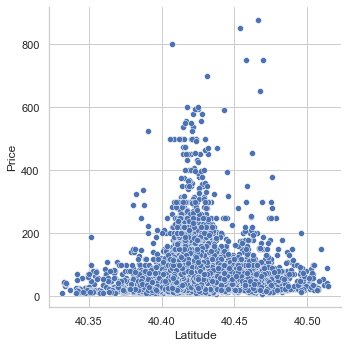

In [127]:
sns.relplot(data=df_madrid, x='Latitude', y='Price')
plt.show()

### 'Longitude'

In [128]:
df_madrid['Longitude'].describe()

count    13207.000000
mean        -3.697143
std          0.023341
min         -3.835498
25%         -3.707793
50%         -3.701580
75%         -3.693816
max         -3.573613
Name: Longitude, dtype: float64

In [129]:
df_madrid['Longitude'].unique()

array([-3.71475403, -3.70943892, -3.71356119, ..., -3.70674261,
       -3.70554235, -3.71037372])

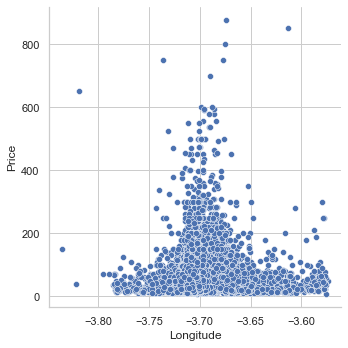

In [130]:
sns.relplot(data=df_madrid, x='Longitude', y='Price')
plt.show()

### Property Type

In [131]:
df_madrid['Property Type'].describe()

count         13207
unique           22
top       Apartment
freq          10888
Name: Property Type, dtype: object

In [132]:
df_madrid['Property Type'].unique()

array(['Apartment', 'Guesthouse', 'Other', 'House', 'Condominium',
       'Bed & Breakfast', 'Loft', 'Dorm', 'Hostel', 'Chalet',
       'Casa particular', 'Townhouse', 'Serviced apartment',
       'Boutique hotel', 'Earth House', 'Camper/RV', 'Villa',
       'Guest suite', 'Timeshare', 'Bungalow', 'Tent', 'Boat'],
      dtype=object)

In [133]:
df_madrid[['ID','Property Type']].groupby(by=['Property Type'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Property Type,
Apartment,10888
House,966
Condominium,345
Bed & Breakfast,337
Loft,283
Other,220
Dorm,43
Guesthouse,39
Chalet,24


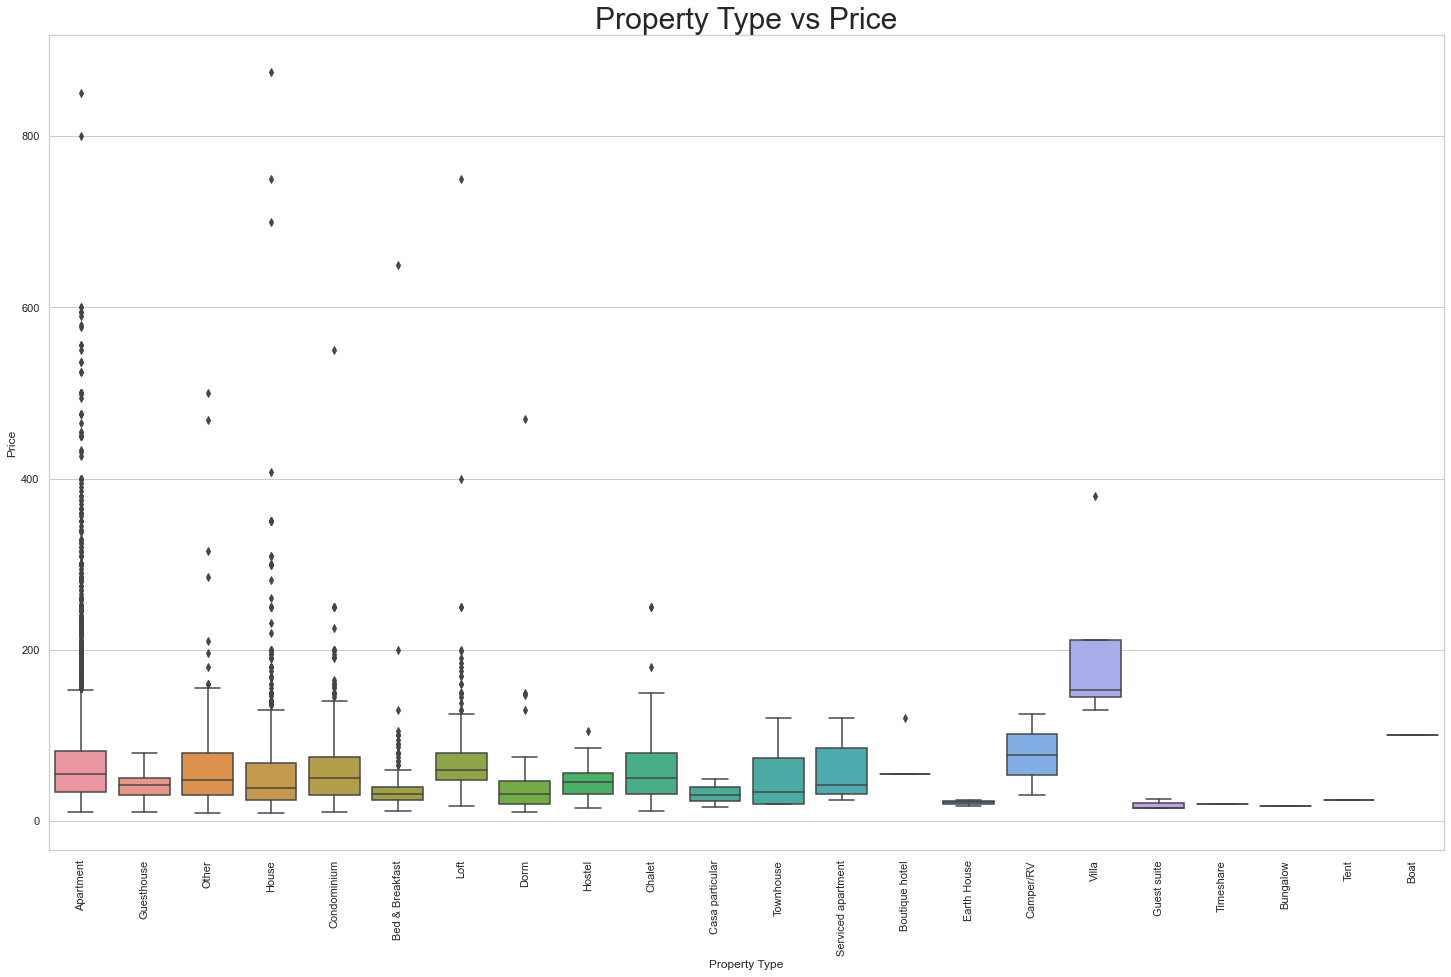

In [134]:
sns.boxplot(x='Property Type', y="Price", data=df_madrid)
plt.title('Property Type vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### Room Type

In [135]:
df_madrid['Room Type'].describe()

count               13207
unique                  3
top       Entire home/apt
freq                 7903
Name: Room Type, dtype: object

**Ojo quitar espacios y simbolos /**

In [136]:
df_madrid[['ID','Room Type']].groupby(by=['Room Type'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Room Type,
Entire home/apt,7903
Private room,5113
Shared room,191


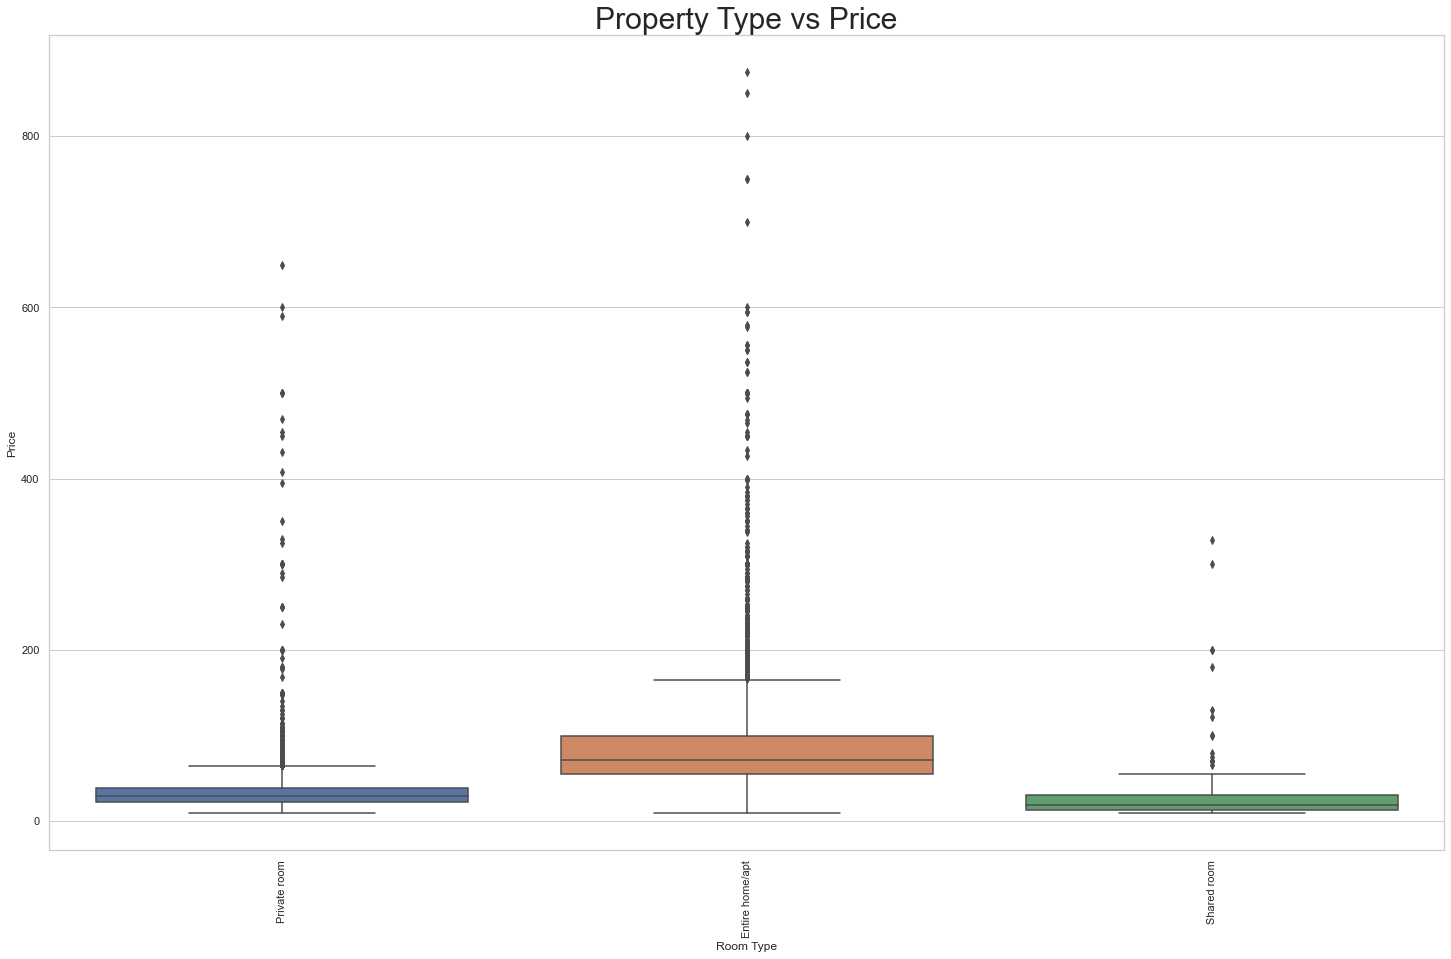

In [137]:
sns.boxplot(x='Room Type', y="Price", data=df_madrid)
plt.title('Property Type vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

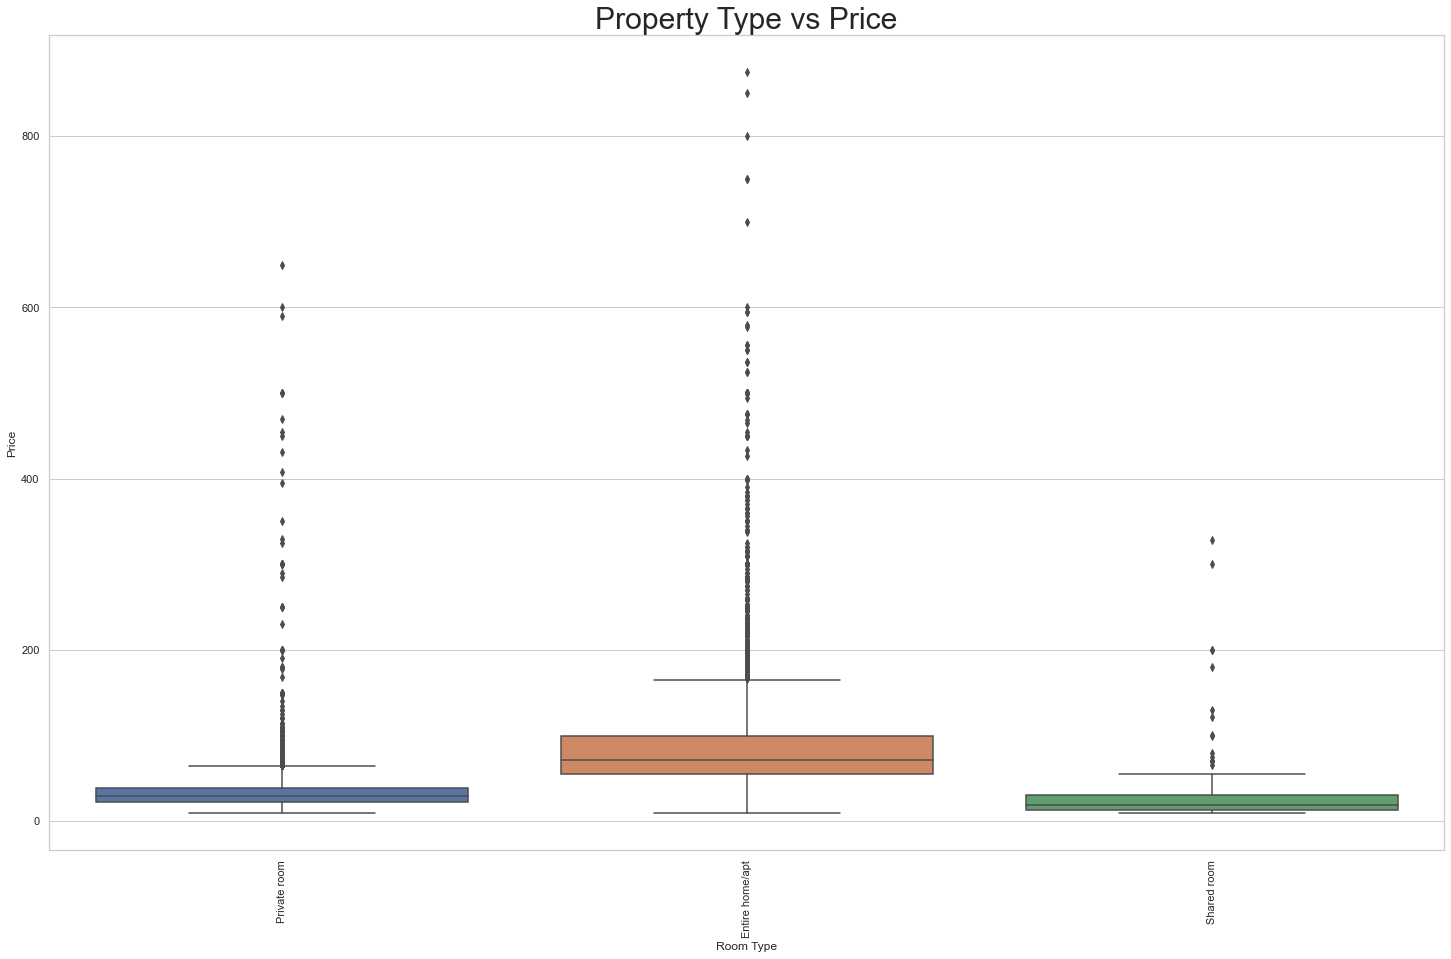

In [138]:
sns.boxplot(x='Room Type', y="Price", data=df_madrid)
plt.title('Property Type vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### Acommodates

In [139]:
df_madrid['Accommodates'].describe()

count    13207.000000
mean         3.191035
std          1.991330
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: Accommodates, dtype: float64

In [140]:
df_madrid[['ID','Accommodates']].groupby(by=['Accommodates'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Accommodates,
2,4708
4,2972
1,1929
3,1304
6,1017
5,640
8,238
7,161
10,90


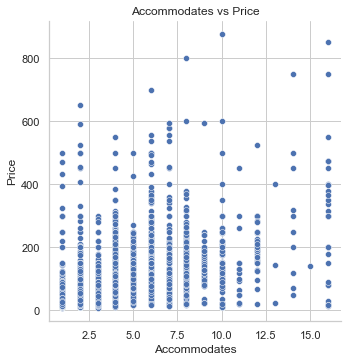

In [141]:
sns.relplot(data=df_madrid, x='Accommodates', y='Price')
plt.title('Accommodates vs Price')
plt.show()

In [142]:
df_madrid[['Accommodates','Price']].corr()

,Accommodates,Price
Accommodates,1.000000,0.580916
Price,0.580916,1.000000


### Bathrooms

In [143]:
df_madrid['Bathrooms'].describe()

count    13158.000000
mean         1.252736
std          0.599699
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Bathrooms, dtype: float64

In [144]:
df_madrid[['ID','Bathrooms']].groupby(by=['Bathrooms'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Bathrooms,
1.0,10067
2.0,2029
1.5,459
3.0,237
2.5,93
0.0,65
0.5,62
NaN,49
5.0,42


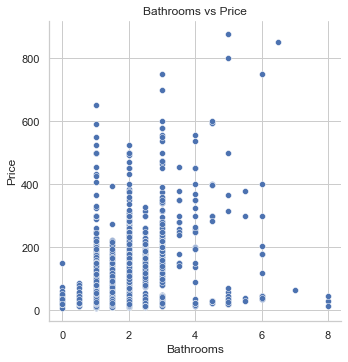

In [145]:
sns.relplot(data=df_madrid, x='Bathrooms', y='Price')
plt.title('Bathrooms vs Price')
plt.show()

In [146]:
df_madrid[['Bathrooms','Price']].corr()

,Bathrooms,Price
Bathrooms,1.000000,0.349508
Price,0.349508,1.000000


### Bedrooms

In [147]:
df_madrid['Bedrooms'].describe()

count    13184.000000
mean         1.294372
std          0.826831
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Bedrooms, dtype: float64

In [148]:
df_madrid[['ID','Bedrooms']].groupby(by=['Bedrooms'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Bedrooms,
1.0,8911
2.0,2331
0.0,925
3.0,735
4.0,196
5.0,53
NaN,23
6.0,16
7.0,6


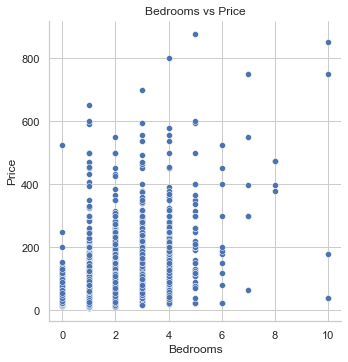

In [149]:
sns.relplot(data=df_madrid, x='Bedrooms', y='Price')
plt.title('Bedrooms vs Price')
plt.show()

In [150]:
df_madrid[['Bedrooms','Price']].corr()

,Bedrooms,Price
Bedrooms,1.000000,0.525673
Price,0.525673,1.000000


### Beds

In [151]:
df_madrid['Beds'].describe()

count    13158.000000
mean         1.986016
std          1.511463
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

In [152]:
df_madrid[['ID','Beds']].groupby(by=['Beds'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Beds,
1.0,6571
2.0,3584
3.0,1477
4.0,805
5.0,310
6.0,176
7.0,67
8.0,63
NaN,49


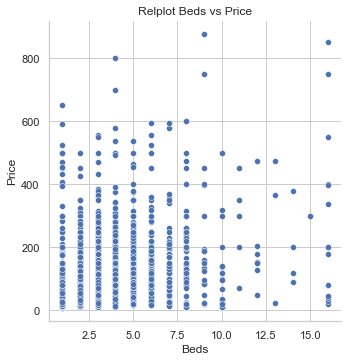

In [153]:
sns.relplot(data=df_madrid, x='Beds', y='Price')
plt.title('Relplot Beds vs Price')
plt.show()

In [154]:
df_madrid[['Accommodates', 'Beds', 'Price']].corr()

,Accommodates,Beds,Price
Accommodates,1.000000,0.824224,0.580916
Beds,0.824224,1.000000,0.486250
Price,0.580916,0.486250,1.000000


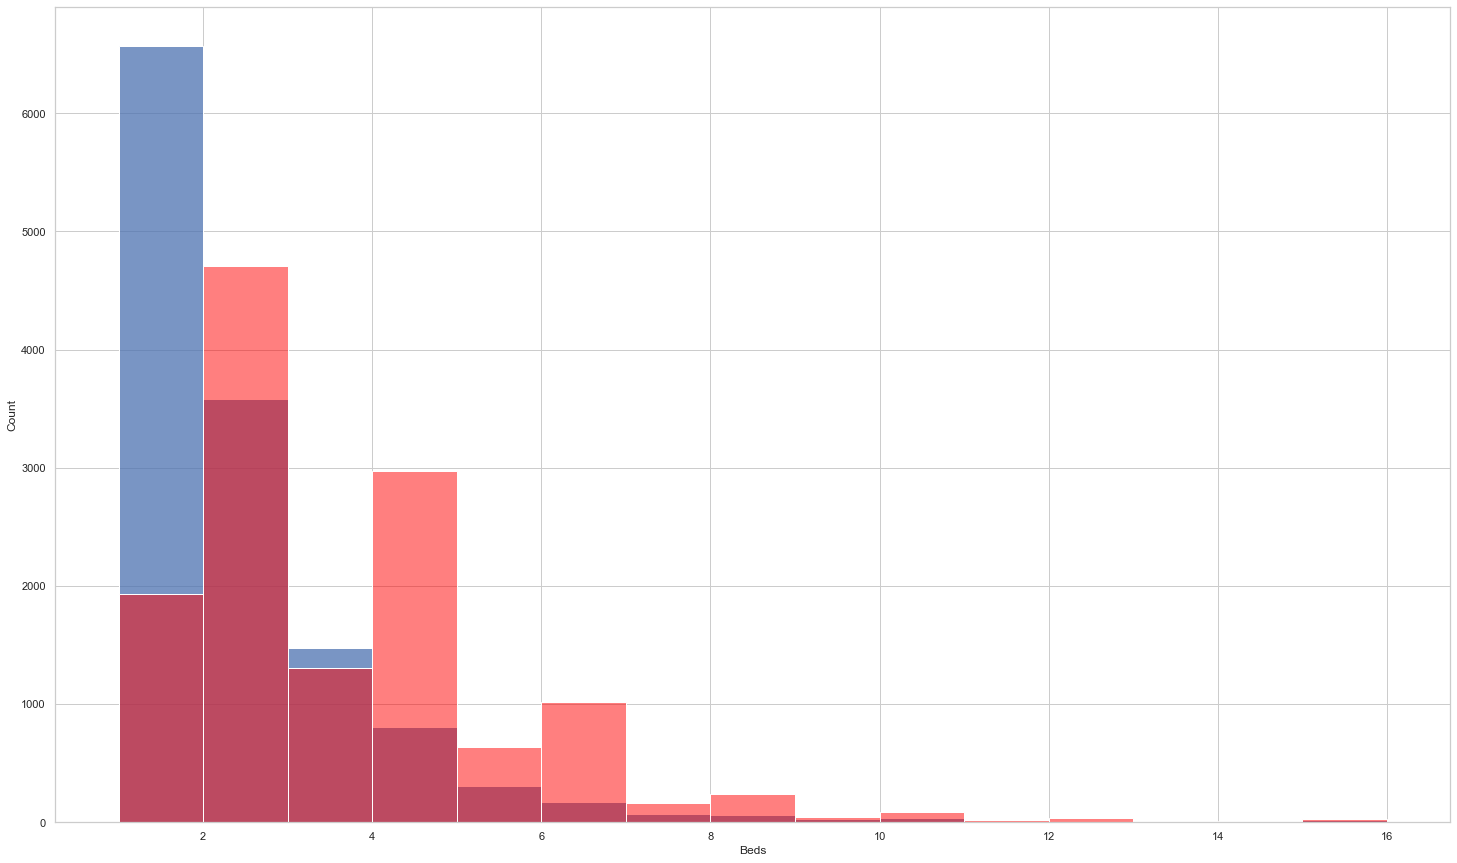

In [155]:
sns.histplot(data=df_madrid, x="Beds", binwidth=1)
sns.histplot(data=df_madrid, x="Accommodates", binwidth=1, color='red', alpha=0.5)
plt.show()

### Bed Type

In [156]:
df_madrid['Bed Type'].describe()

count        13207
unique           5
top       Real Bed
freq         12914
Name: Bed Type, dtype: object

In [157]:
df_madrid['Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [158]:
df_madrid[['ID','Bed Type']].groupby(by=['Bed Type'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Bed Type,
Real Bed,12914
Pull-out Sofa,238
Futon,35
Couch,15
Airbed,5


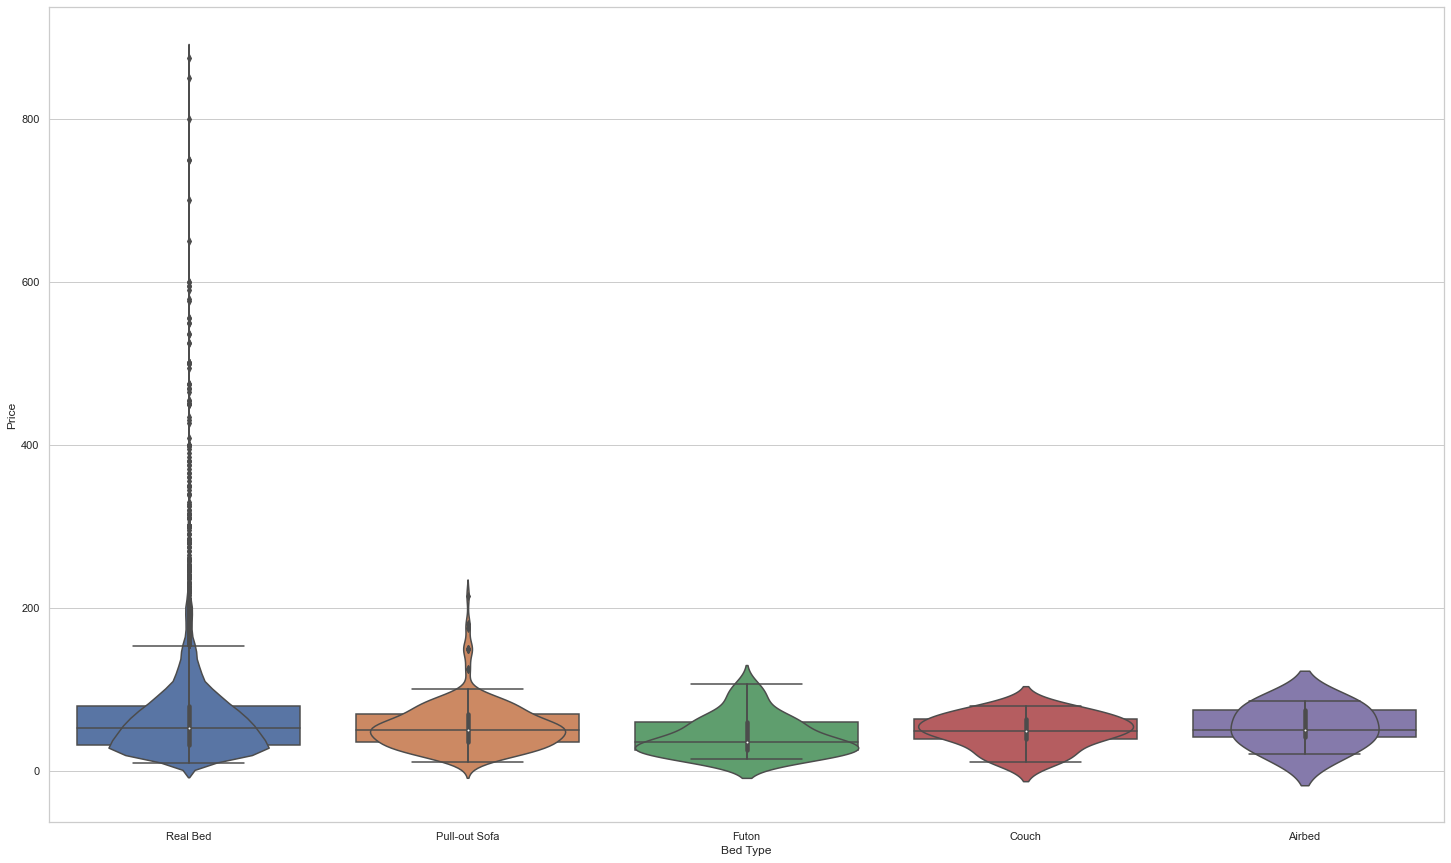

In [159]:
sns.boxplot(x='Bed Type', y="Price", data=df_madrid)
sns.violinplot(x='Bed Type', y="Price", data=df_madrid)
plt.show()

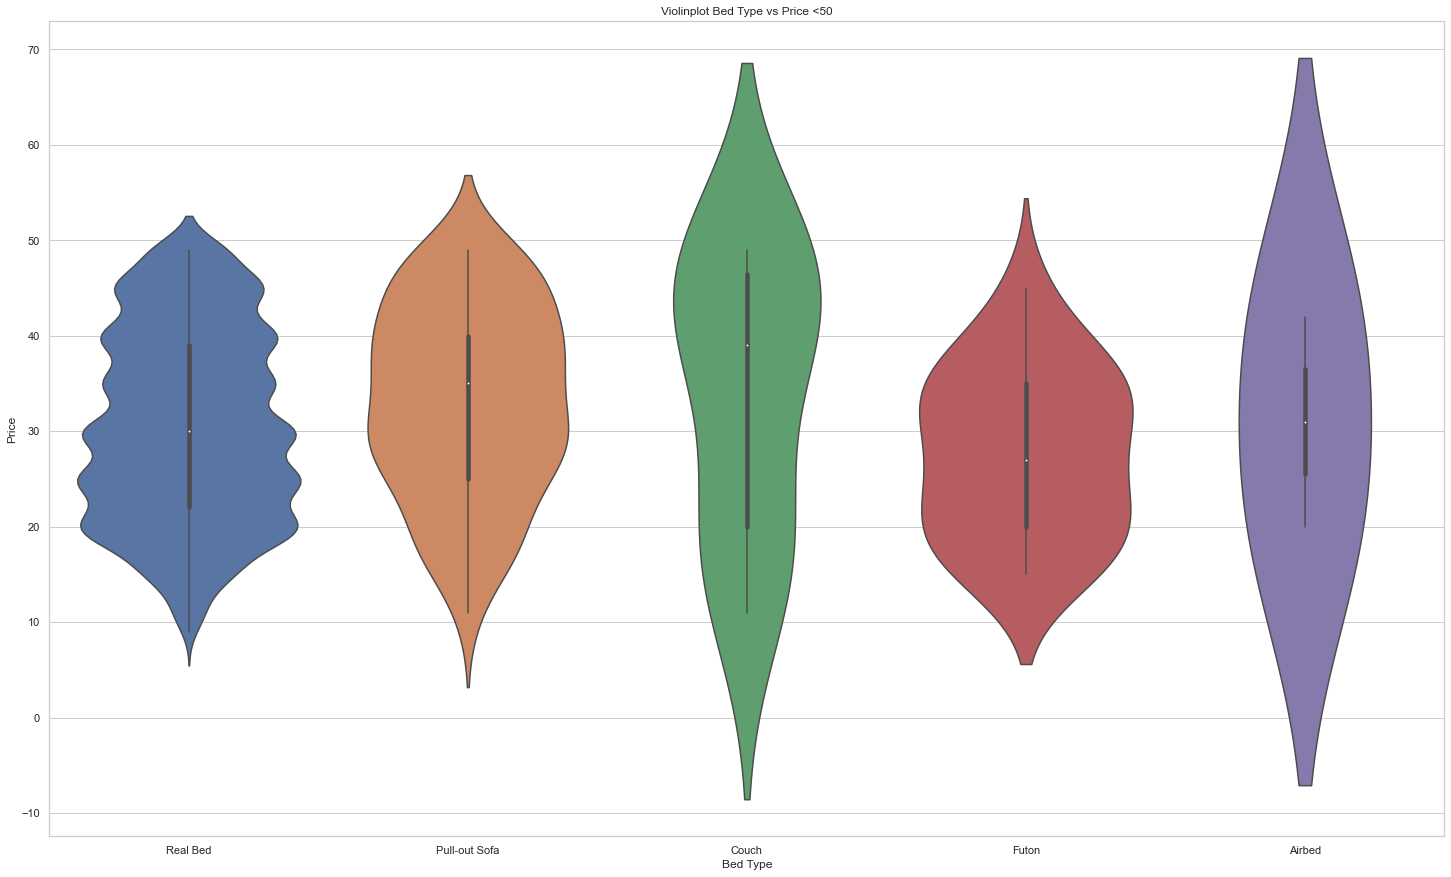

In [160]:
sns.violinplot(x='Bed Type', y="Price", data=df_madrid[df_madrid['Price']<50])
plt.title('Violinplot Bed Type vs Price <50')
plt.show()

In [161]:
df_madrid[['ID','Bed Type', 'Beds']][df_madrid['Bed Type'] != 'Real Bed'].groupby(by=['Bed Type','Beds'], dropna=False).count().sort_values(by='Beds', ascending=True)

,,ID
Bed Type,Beds,
Airbed,1.0,4
Couch,1.0,12
Futon,1.0,27
Pull-out Sofa,1.0,171
Airbed,2.0,1
Couch,2.0,3
Futon,2.0,5
Pull-out Sofa,2.0,49
Futon,3.0,2


### Amenities

In [162]:
df_madrid['Amenities'].describe()

count                                                 13100
unique                                                11072
top       TV,Internet,Wireless Internet,Air conditioning...
freq                                                     41
Name: Amenities, dtype: object

In [163]:
df_madrid['Amenities'].unique()

array(['TV,Internet,Wireless Internet,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Lock on bedroom door,Hangers',
       'TV,Wireless Internet,Air conditioning,Kitchen,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hair dryer,Iron,Laptop friendly workspace',
       'Wireless Internet,Kitchen,Pets allowed,Buzzer/wireless intercom,Heating,Washer',
       ...,
       'TV,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Doorman,Elevator in building,Heating,Family/kid friendly,Washer',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets live on this property,Cat(s),Heating,Washer'],
      dtype=object)

In [164]:
df_madrid['Amenities'].head(10)

3     TV,Internet,Wireless Internet,Kitchen,Doorman,...
4     TV,Wireless Internet,Air conditioning,Kitchen,...
5     Wireless Internet,Kitchen,Pets allowed,Buzzer/...
6     TV,Internet,Wireless Internet,Air conditioning...
7     TV,Internet,Wireless Internet,Kitchen,Pets all...
8     Wireless Internet,Kitchen,Smoking allowed,Door...
9     Wireless Internet,Kitchen,Smoking allowed,Door...
10    Internet,Wireless Internet,Air conditioning,Ki...
11    TV,Internet,Wireless Internet,Kitchen,Elevator...
12    TV,Internet,Wireless Internet,Air conditioning...
Name: Amenities, dtype: object

In [165]:
df_madrid[['ID','Amenities']].groupby(by=['Amenities'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Amenities,
NaN,107
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace",41
"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",34
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",28
"translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",28
...,...
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Hangers,Hair dryer",1
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Shampoo",1
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_50",1


### Sqaure Feet

In [166]:
df_madrid['Square Feet'].describe()

count     519.000000
mean      378.007707
std       546.793839
min         0.000000
25%         0.000000
50%       108.000000
75%       646.000000
max      5167.000000
Name: Square Feet, dtype: float64

### Weekly Price 

In [167]:
df_madrid['Weekly Price'].describe()

count    3349.000000
mean      368.633025
std       191.623325
min        70.000000
25%       200.000000
50%       350.000000
75%       490.000000
max       999.000000
Name: Weekly Price, dtype: float64

### Monthly Price  

In [168]:
df_madrid['Monthly Price'].describe()

count     3314.000000
mean      1347.122812
std        986.070781
min        250.000000
25%        700.000000
50%       1200.000000
75%       1680.000000
max      25000.000000
Name: Monthly Price, dtype: float64

### Security Deposit

In [169]:
df_madrid['Security Deposit'].describe()

count    5635.000000
mean      183.462289
std       109.056807
min        70.000000
25%       100.000000
50%       150.000000
75%       200.000000
max       990.000000
Name: Security Deposit, dtype: float64

In [170]:
df_madrid[['ID','Security Deposit']].groupby(by=['Security Deposit'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Security Deposit,
NaN,7572
100.0,1489
200.0,1285
150.0,1097
300.0,430
250.0,262
500.0,133
90.0,130
120.0,99


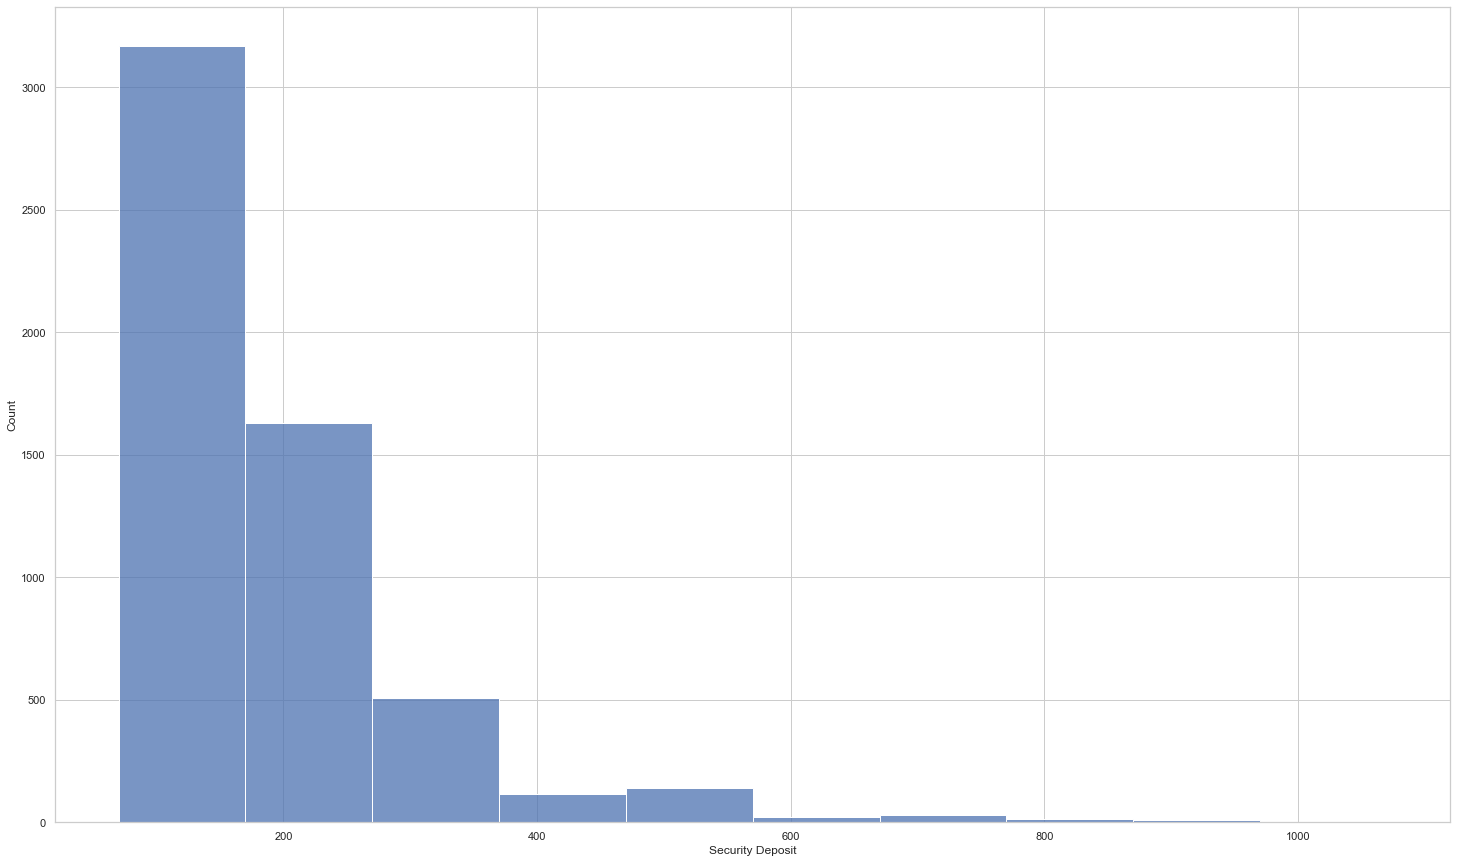

In [171]:
sns.histplot(data=df_madrid, x="Security Deposit", binwidth=100)
plt.show()

**NaN diría que es 0, sin deposito de seguridad**

### Cleaning fee

In [172]:
df_madrid['Cleaning Fee'].describe()

count    7820.000000
mean       29.629284
std        25.938993
min         4.000000
25%        15.000000
50%        25.000000
75%        35.000000
max       500.000000
Name: Cleaning Fee, dtype: float64

In [173]:
df_madrid[['ID','Cleaning Fee']].groupby(by=['Cleaning Fee'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Cleaning Fee,
NaN,5387
30.0,1314
20.0,1151
10.0,795
15.0,693
25.0,688
40.0,540
50.0,402
5.0,377


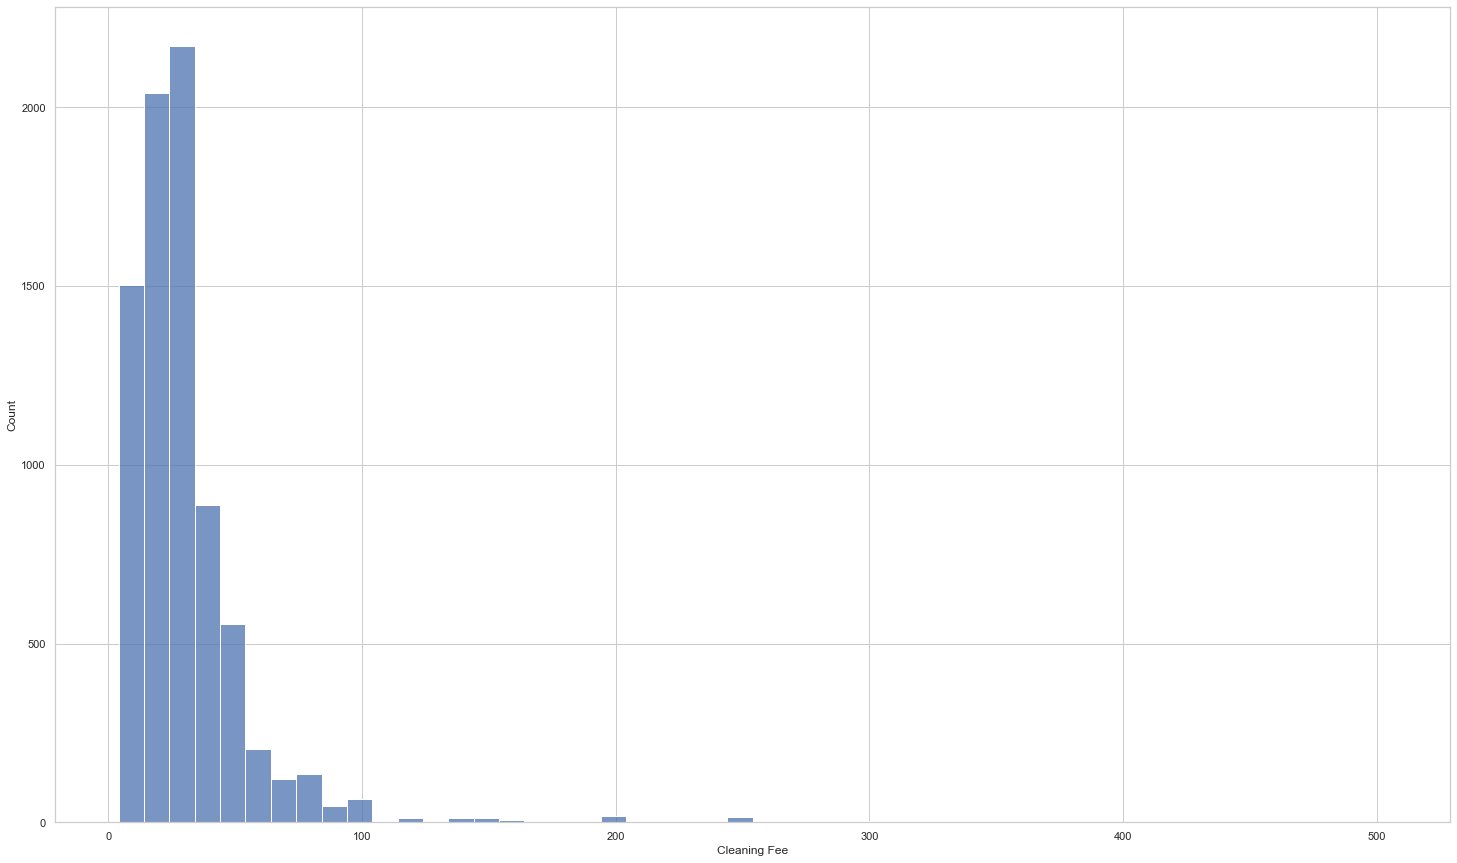

In [174]:
sns.histplot(data=df_madrid, x="Cleaning Fee", binwidth=10)
plt.show()

In [175]:
df_madrid[df_madrid['Cleaning Fee']>400].head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Log Price
4760,13647790,https://www.airbnb.com/rooms/13647790,20170407214119,2017-04-08,"Magnífica casa con jardín,piscina y pista de p...",Magnífica casa en una planta con una superfici...,NaN,Magnífica casa en una planta con una superfici...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,32046323,https://www.airbnb.com/users/show/32046323,Celine,2015-04-27,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/pictures/e4454266-8...,https://a0.muscache.com/im/pictures/e4454266-8...,La Latina,68.0,68.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28035, Spain",NaN,Ciudad Universitaria,Moncloa - Aravaca,Madrid,Comunidad de Madrid,28035,Madrid,"Madrid, Spain",ES,Spain,40.469604,-3.736424,House,Entire home/apt,14,6.0,7.0,9.0,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kit...",NaN,750.0,NaN,NaN,NaN,500.0,1,0,30,1125,4 weeks ago,NaN,23,53,83,358,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,39.0,NaN,"40.469603583956285, -3.7364241475230737","Host Has Profile Pic,Host Identity Verified,Re...",6.620073


**NaN diría que es 0, sin cleaning fee**

**500 parece una cifra real, es una casa con piscina**

### Guest included

In [176]:
df_madrid['Guests Included'].describe()

count    13207.000000
mean         1.574695
std          1.083241
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Guests Included, dtype: float64

In [177]:
df_madrid[['ID','Guests Included']].groupby(by=['Guests Included'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Guests Included,
1,8638
2,3181
4,686
3,413
6,120
5,97
7,27
8,26
10,8


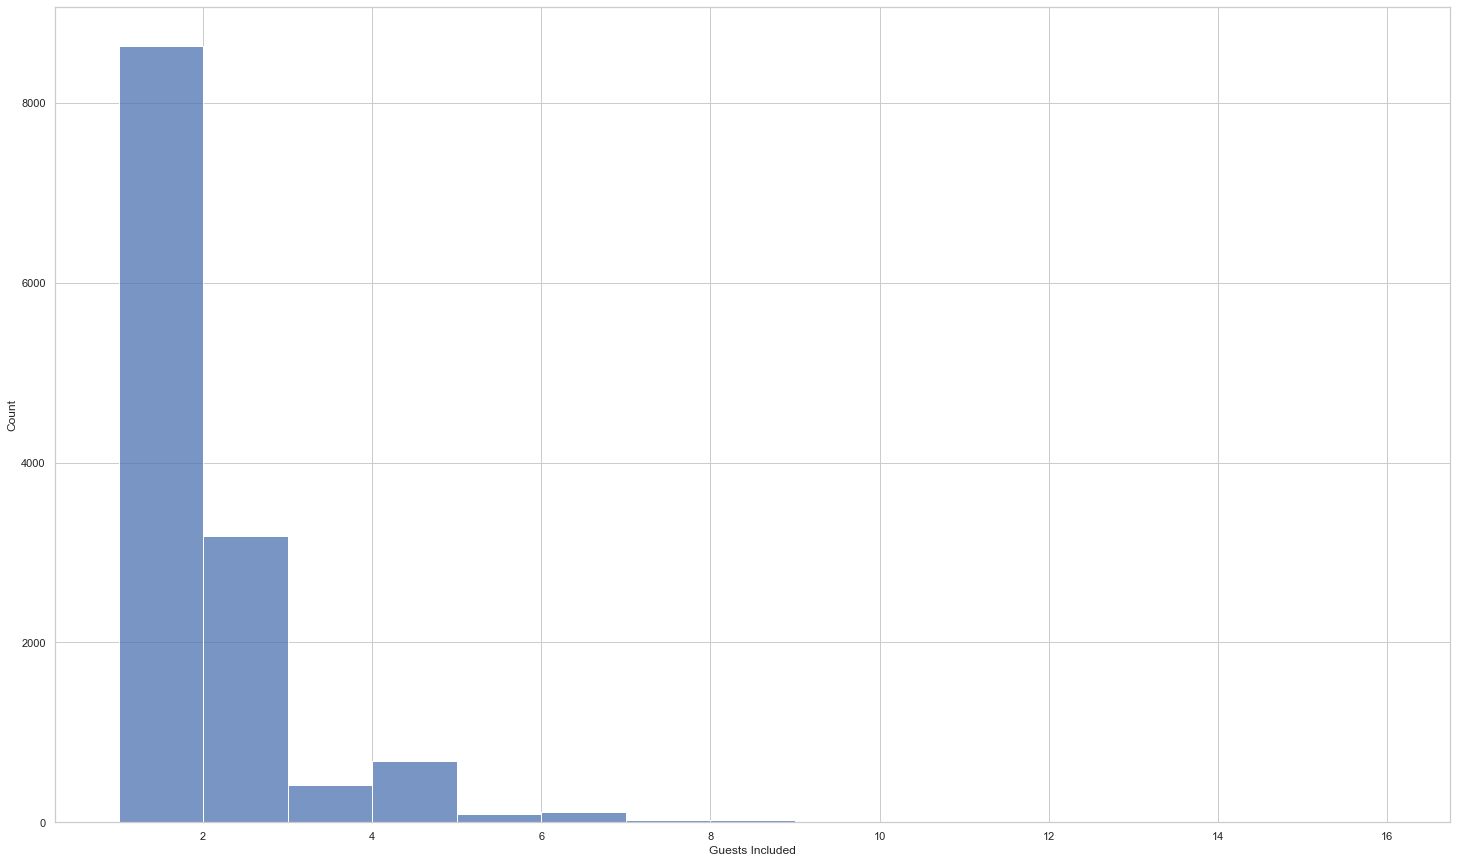

In [178]:
sns.histplot(data=df_madrid, x="Guests Included", binwidth=1)
plt.show()

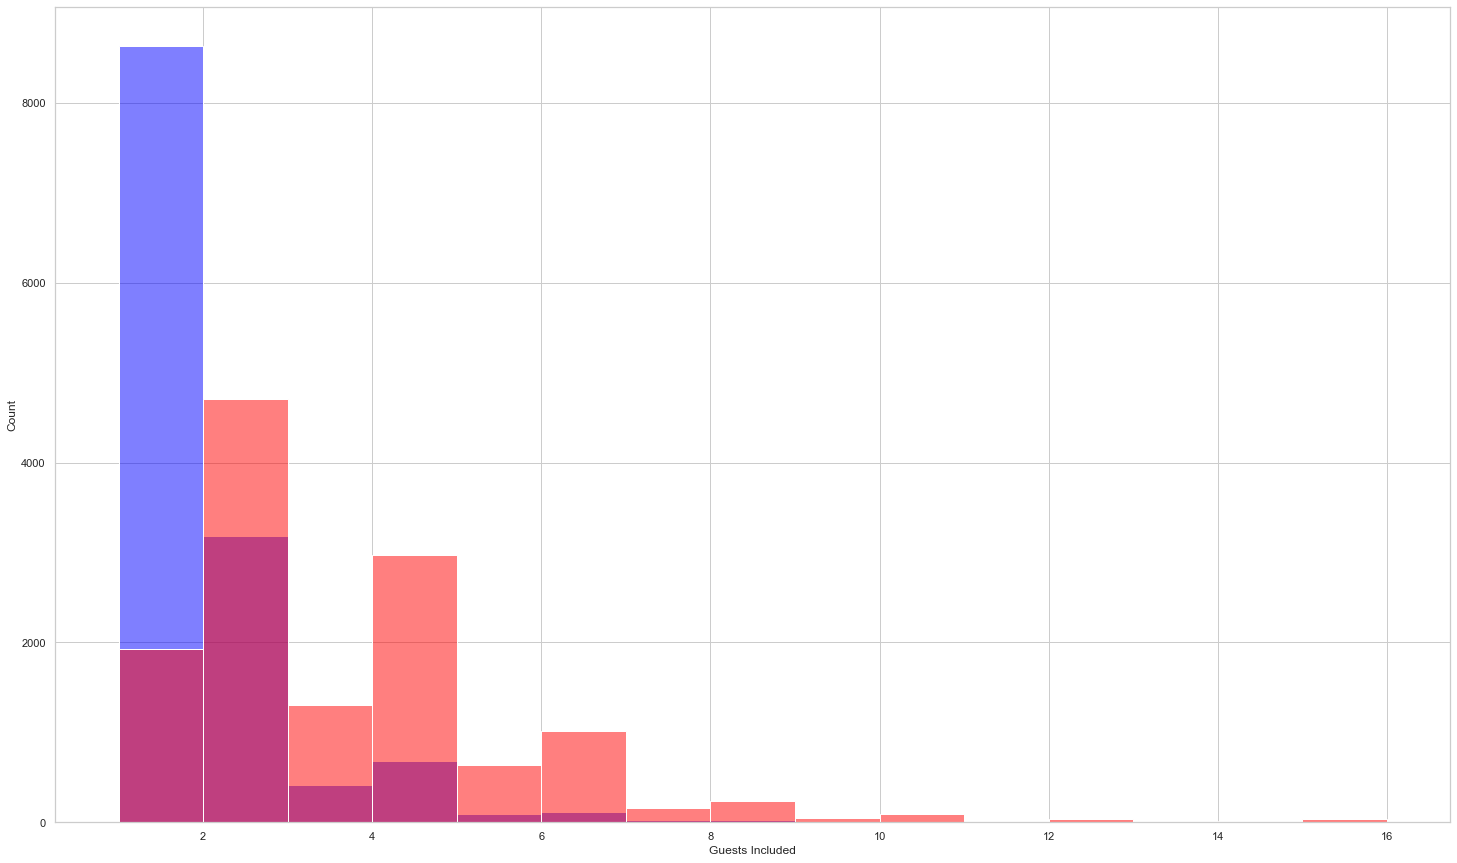

In [179]:
sns.histplot(data=df_madrid, x="Guests Included", binwidth=1, color='blue', alpha=0.5)
sns.histplot(data=df_madrid, x="Accommodates", binwidth=1, color='red', alpha=0.5)
plt.show()

In [180]:
df_madrid[['Guests Included', 'Accommodates']].head(10)

,Guests Included,Accommodates
3,1,2
4,1,2
5,1,2
6,2,4
7,6,8
8,1,2
9,1,1
10,1,2
11,1,2
12,1,2


**ojo no es lo mismo que acommodates**

### Extra People

In [181]:
df_madrid['Extra People'].describe()

count    13207.000000
mean         7.410161
std         10.760022
min          0.000000
25%          0.000000
50%          0.000000
75%         14.000000
max        276.000000
Name: Extra People, dtype: float64

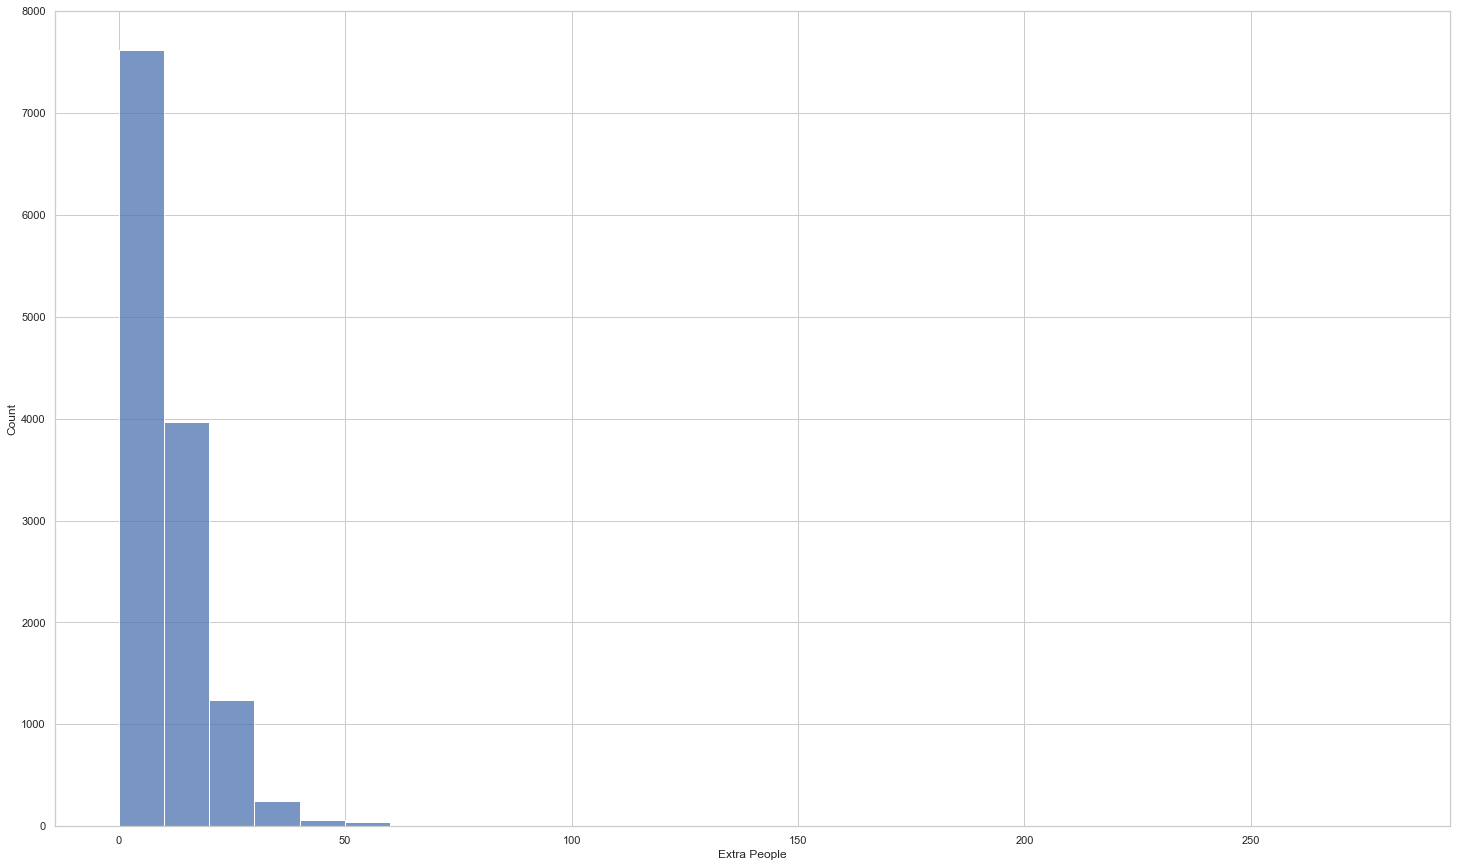

In [182]:
sns.histplot(data=df_madrid, x="Extra People", binwidth=10)
plt.show()

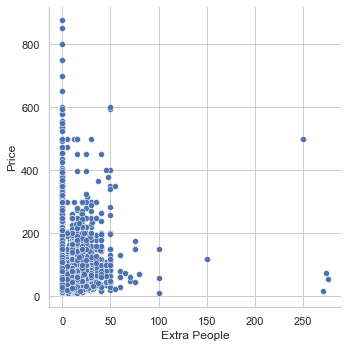

In [183]:
sns.relplot(data=df_madrid, y= 'Price', x='Extra People')
plt.show()

In [184]:
df_madrid[['Extra People', 'Accommodates','Guests Included','Price']].corr()

,Extra People,Accommodates,Guests Included,Price
Extra People,1.000000,0.273281,0.347285,0.110451
Accommodates,0.273281,1.000000,0.582593,0.580916
Guests Included,0.347285,0.582593,1.000000,0.371806
Price,0.110451,0.580916,0.371806,1.000000


In [185]:
df_madrid[['Extra People', 'Guests Included', 'Accommodates','Description']][df_madrid["Extra People"]>50]

,Extra People,Guests Included,Accommodates,Description
452,250,1,5,Justo en el corazón del distrito cultural de M...
760,60,1,7,Piso situado en el centro de Madrid. Rodeado d...
1142,70,2,2,Descripción de la vivienda Preciosa buhardilla...
1378,274,2,2,This is a completely refurbished studio of 54 ...
1507,70,1,2,Apartment located in one of most beautiful nei...
2559,250,1,6,"The house has 165 m2, 3 bedrooms and 3 bathroo..."
2940,60,2,4,"This is a one room appartment of 30m2, with ..."
3025,276,2,2,Lugares de interés: Plaza Olavide. Zona Barri...
3895,100,2,2,My place is 3 minutes from metro station Sol a...
4298,250,1,6,CHALET INDUSTRIAL-CHIC RETIRO PARK2 This vill...


**ojo parece que haymuchos outliers claro**

### Minimum Nights

In [186]:
df_madrid['Minimum Nights'].describe()

count    13207.000000
mean         3.022564
std         12.887293
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64

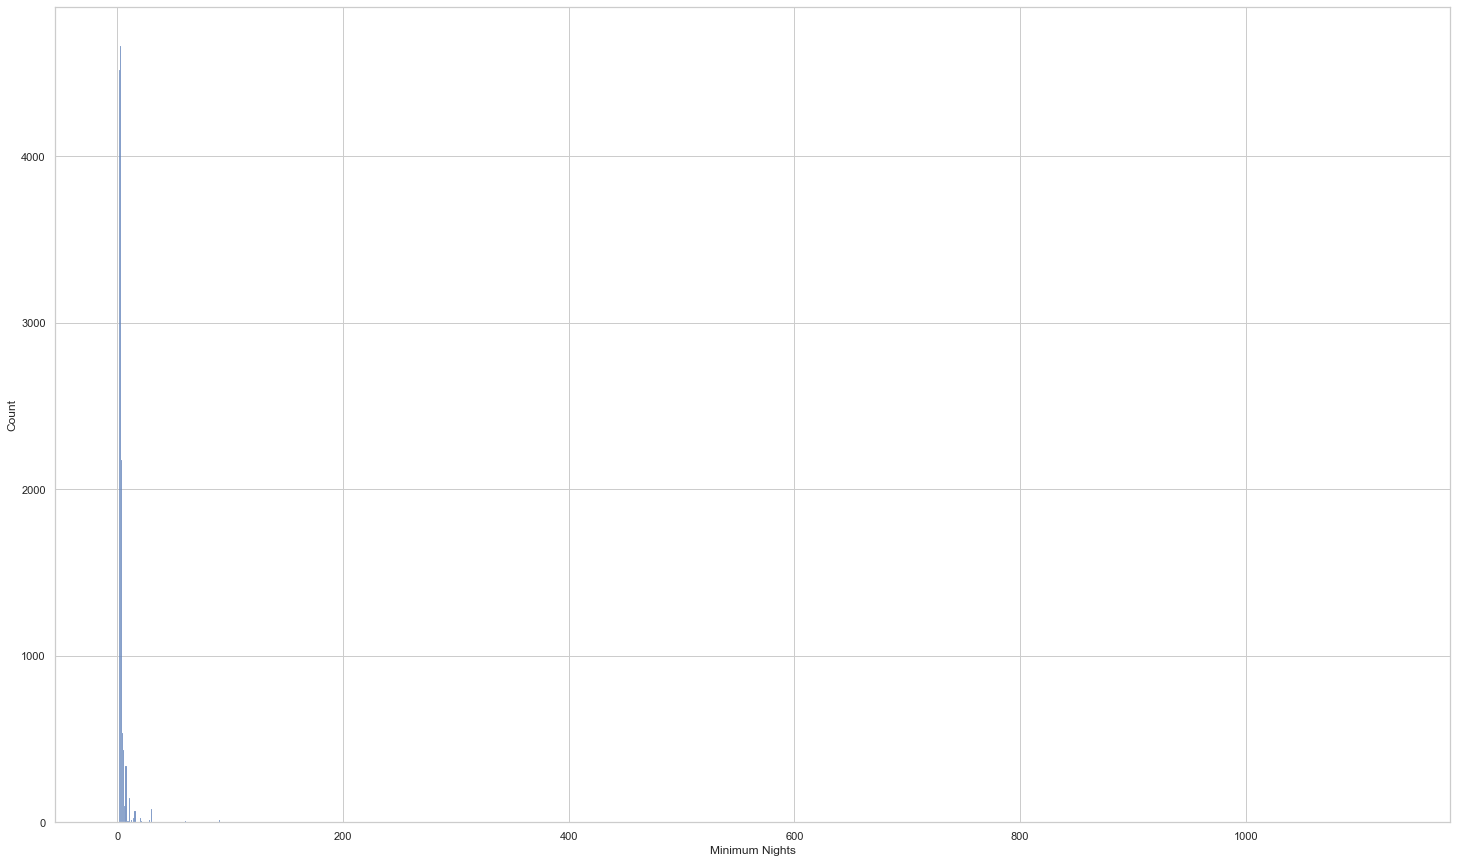

In [187]:
sns.histplot(data=df_madrid, x='Minimum Nights', binwidth=1)
plt.show()

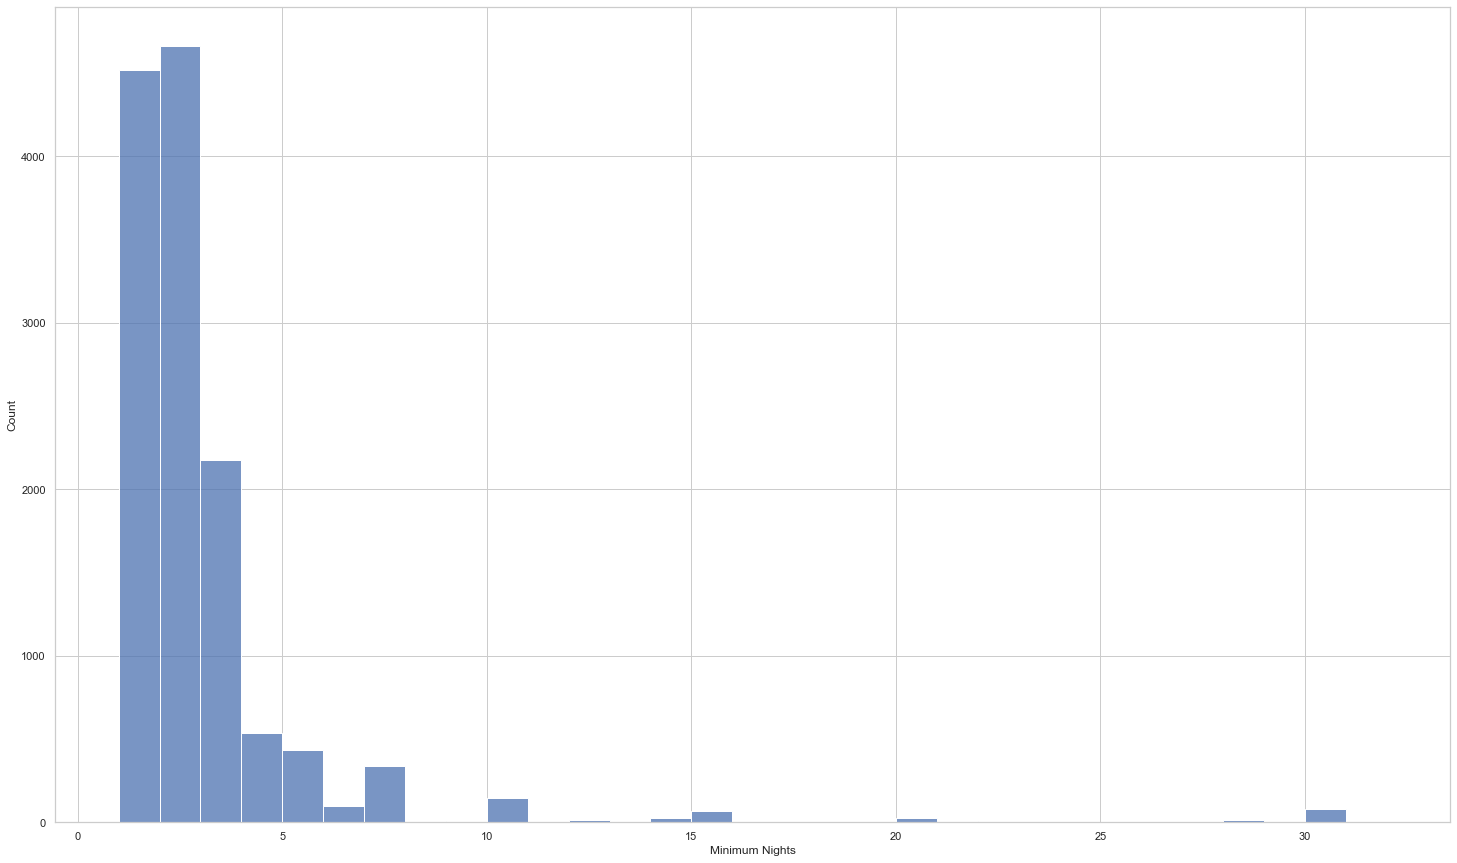

In [188]:
sns.histplot(data=df_madrid[df_madrid['Minimum Nights'] < 40], x='Minimum Nights', binwidth=1)
plt.show()

**Puede que los mayores de 40 sean outliers**

In [189]:
df_madrid[['Price', 'Minimum Nights']].corr()

,Price,Minimum Nights
Price,1.000000,0.030708
Minimum Nights,0.030708,1.000000


### Maximum Nights

Maximum Nights

13207 non-null

int64  

In [190]:
df_madrid['Maximum Nights'].describe()

count      13207.000000
mean         958.921481
std         8926.020544
min            1.000000
25%          365.000000
50%         1125.000000
75%         1125.000000
max      1000000.000000
Name: Maximum Nights, dtype: float64

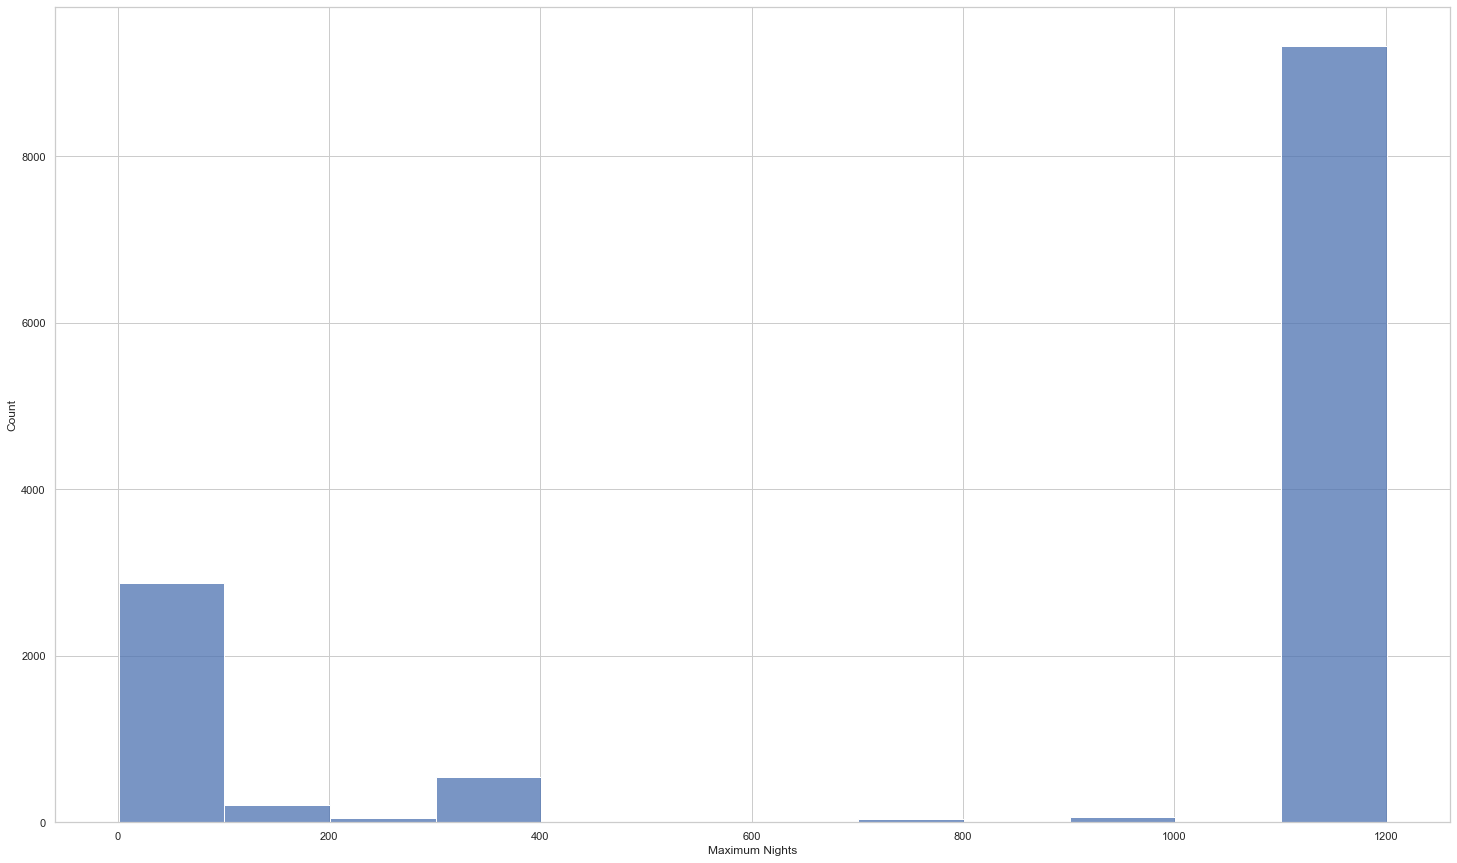

In [191]:
sns.histplot(data=df_madrid[df_madrid['Maximum Nights'] < 1200], x='Maximum Nights', binwidth=100)
plt.show()

**Parece un numero que la gente pone bastante aleatoriamente**

### Claendar updated

In [192]:
df_madrid['Calendar Updated'].describe()

count     13207
unique       57
top       today
freq       3413
Name: Calendar Updated, dtype: object

In [193]:
df_madrid['Calendar Updated'].unique()

array(['4 days ago', '5 days ago', 'today', '4 weeks ago', 'a week ago',
       '2 months ago', '2 weeks ago', '6 days ago', '3 weeks ago',
       'never', '6 months ago', 'yesterday', '1 week ago', '6 weeks ago',
       '10 months ago', '5 weeks ago', '7 months ago', '3 days ago',
       '17 months ago', '13 months ago', '11 months ago', '3 months ago',
       '22 months ago', '18 months ago', '5 months ago', '4 months ago',
       '8 months ago', '20 months ago', '2 days ago', '16 months ago',
       '14 months ago', '24 months ago', '7 weeks ago', '19 months ago',
       '15 months ago', '12 months ago', '48 months ago', '9 months ago',
       '21 months ago', '30 months ago', '26 months ago', '29 months ago',
       '23 months ago', '34 months ago', '51 months ago', '25 months ago',
       '45 months ago', '31 months ago', '35 months ago', '33 months ago',
       '28 months ago', '27 months ago', '37 months ago', '57 months ago',
       '58 months ago', '52 months ago', '50 months 

In [194]:
df_madrid[['ID','Calendar Updated']].groupby(by=['Calendar Updated'], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

,ID
Calendar Updated,
today,3413
yesterday,1108
2 weeks ago,1064
a week ago,1017
3 days ago,790
4 days ago,626
2 months ago,532
5 days ago,491
3 weeks ago,485


In [195]:
df_madrid[['Calendar Updated','Price']].loc[df_madrid.apply(lambda x: x['Calendar Updated'] in ['today', 'yesterday', '3 days ago', 'a week ago', '2 weeks ago', 'never'], axis=1)].groupby(by=['Calendar Updated'], dropna=False).median().sort_values(by='Price', ascending=False).head(15)

,Price
Calendar Updated,
today,70.0
2 weeks ago,50.0
3 days ago,50.0
yesterday,50.0
a week ago,45.0
never,45.0


**Posible transformación a días desde la última aztualización**

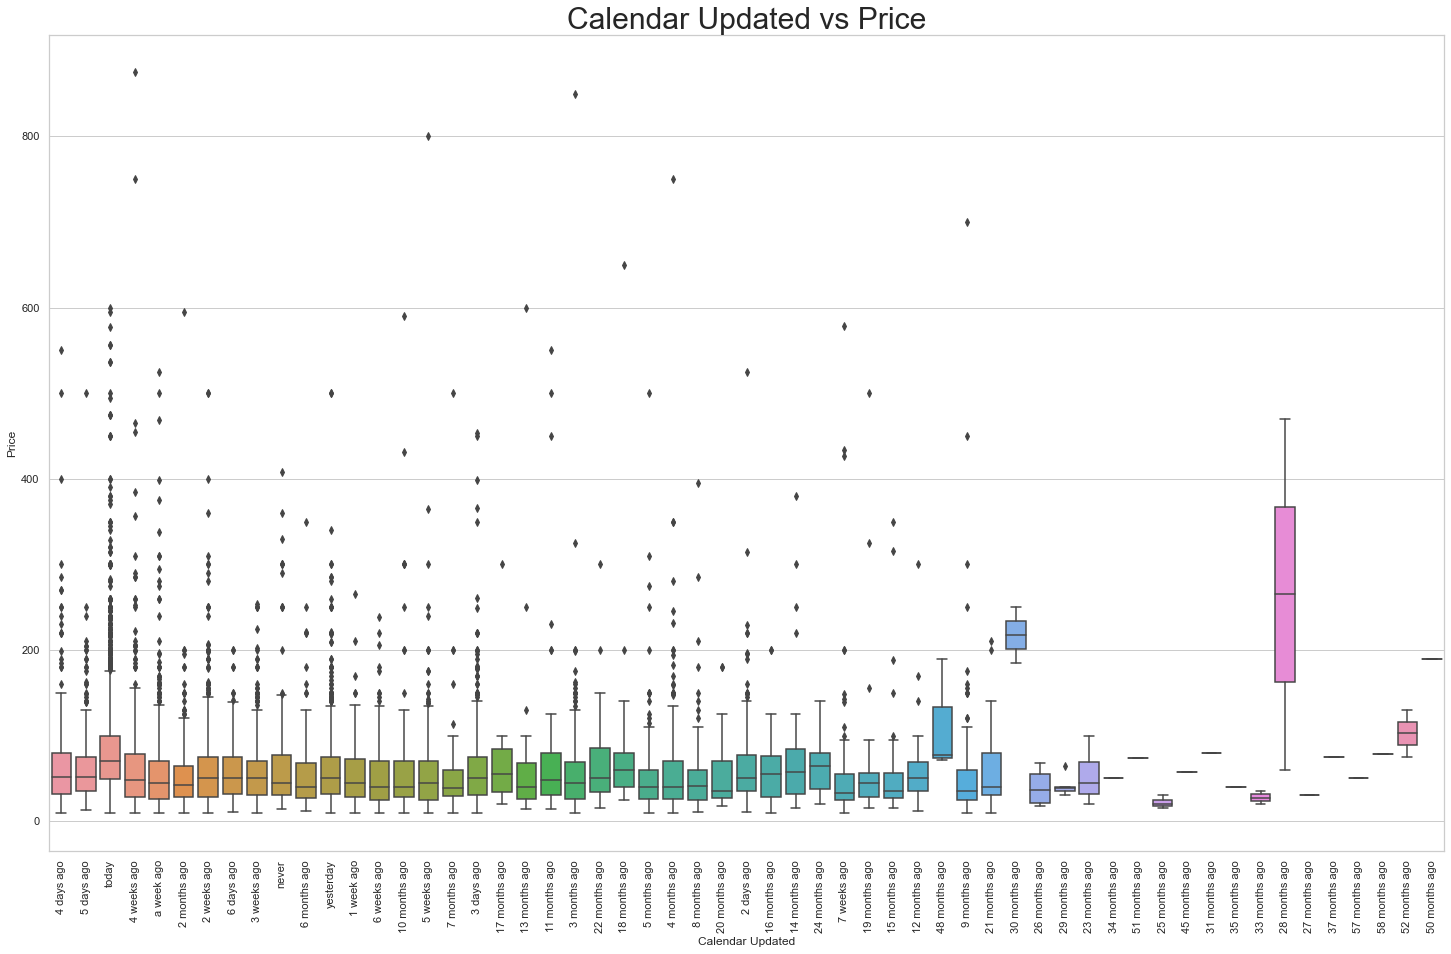

In [196]:
sns.boxplot(x='Calendar Updated', y="Price", data=df_madrid)
plt.title('Calendar Updated vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

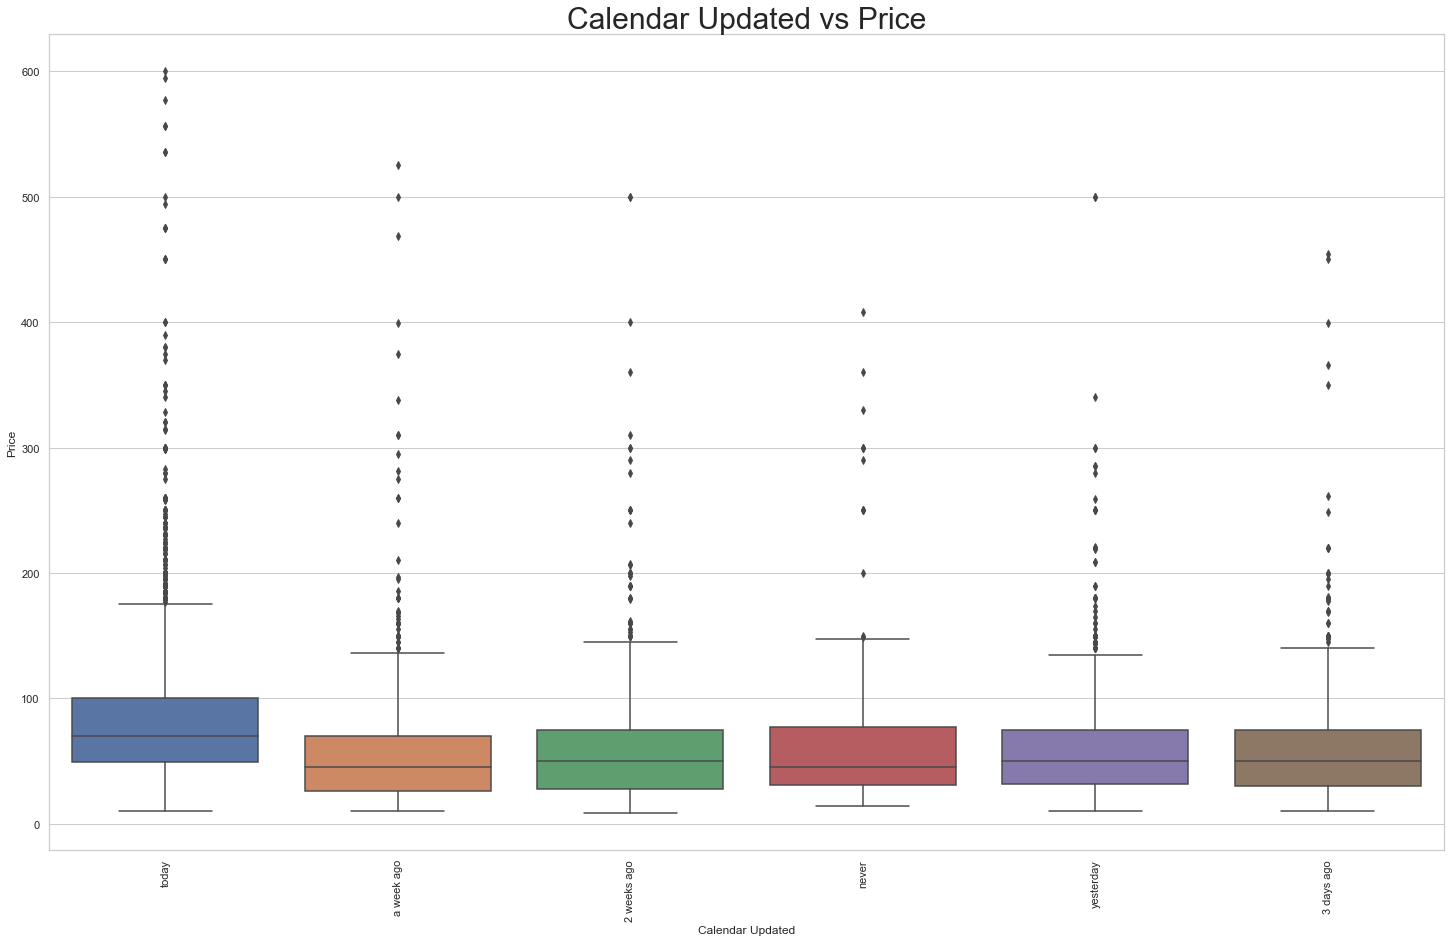

In [197]:
sns.boxplot(x='Calendar Updated', y="Price", data=df_madrid.loc[df_madrid.apply(lambda x: x['Calendar Updated'] in ['today', 'yesterday', '3 days ago', 'a week ago', '2 weeks ago', 'never'], axis=1)])
plt.title('Calendar Updated vs Price', size= 30)
plt.xticks(rotation=90)
plt.show()

### Has Availability 

Todo nulls

### Avlailability 30

In [198]:
df_madrid['Availability 30'].describe()

count    13207.000000
mean         8.710078
std          9.047952
min          0.000000
25%          0.000000
50%          6.000000
75%         13.000000
max         30.000000
Name: Availability 30, dtype: float64

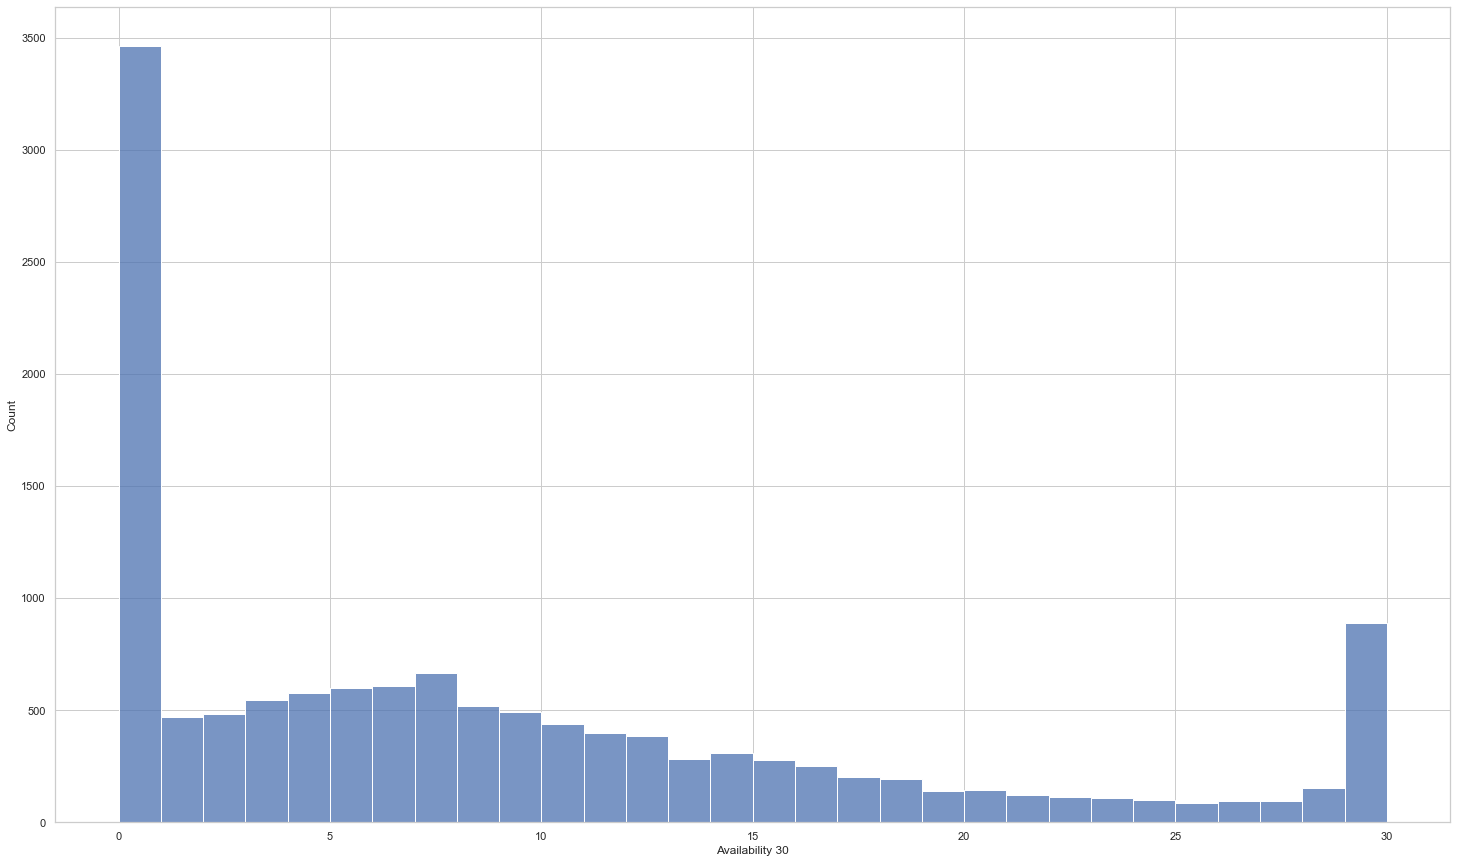

In [199]:
sns.histplot(data=df_madrid, x='Availability 30', binwidth=1)
plt.show()

### Availability 60

In [200]:
df_madrid['Availability 60'].describe()

count    13207.000000
mean        22.862649
std         19.449140
min          0.000000
25%          5.000000
50%         20.000000
75%         38.000000
max         60.000000
Name: Availability 60, dtype: float64

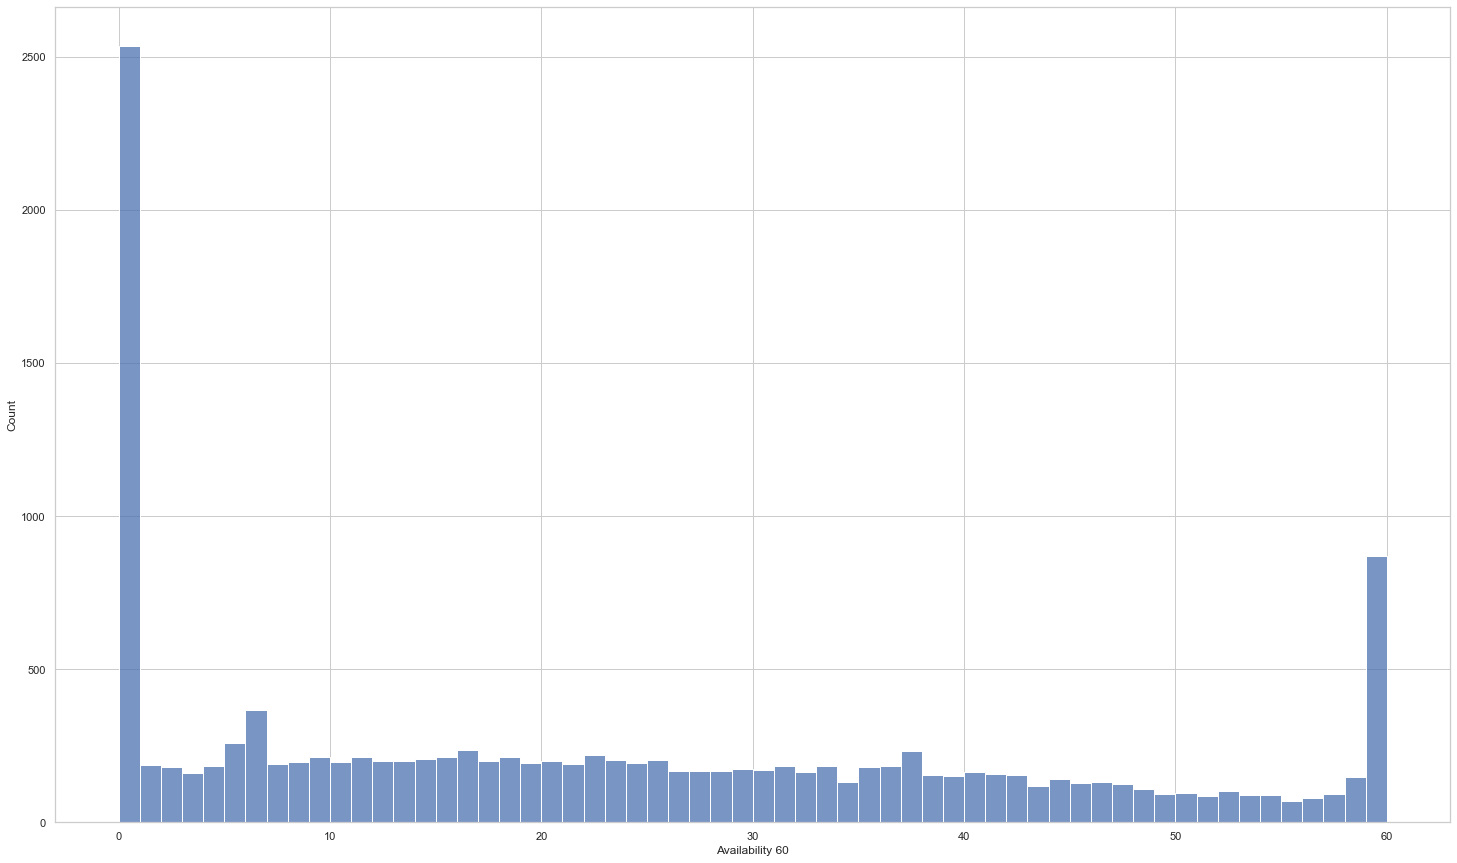

In [201]:
sns.histplot(data=df_madrid, x='Availability 60', binwidth=1)
plt.show()

### Availability 90

In [202]:
df_madrid['Availability 90'].describe()

count    13207.000000
mean        40.016734
std         29.275270
min          0.000000
25%         13.000000
50%         38.000000
75%         65.000000
max         90.000000
Name: Availability 90, dtype: float64

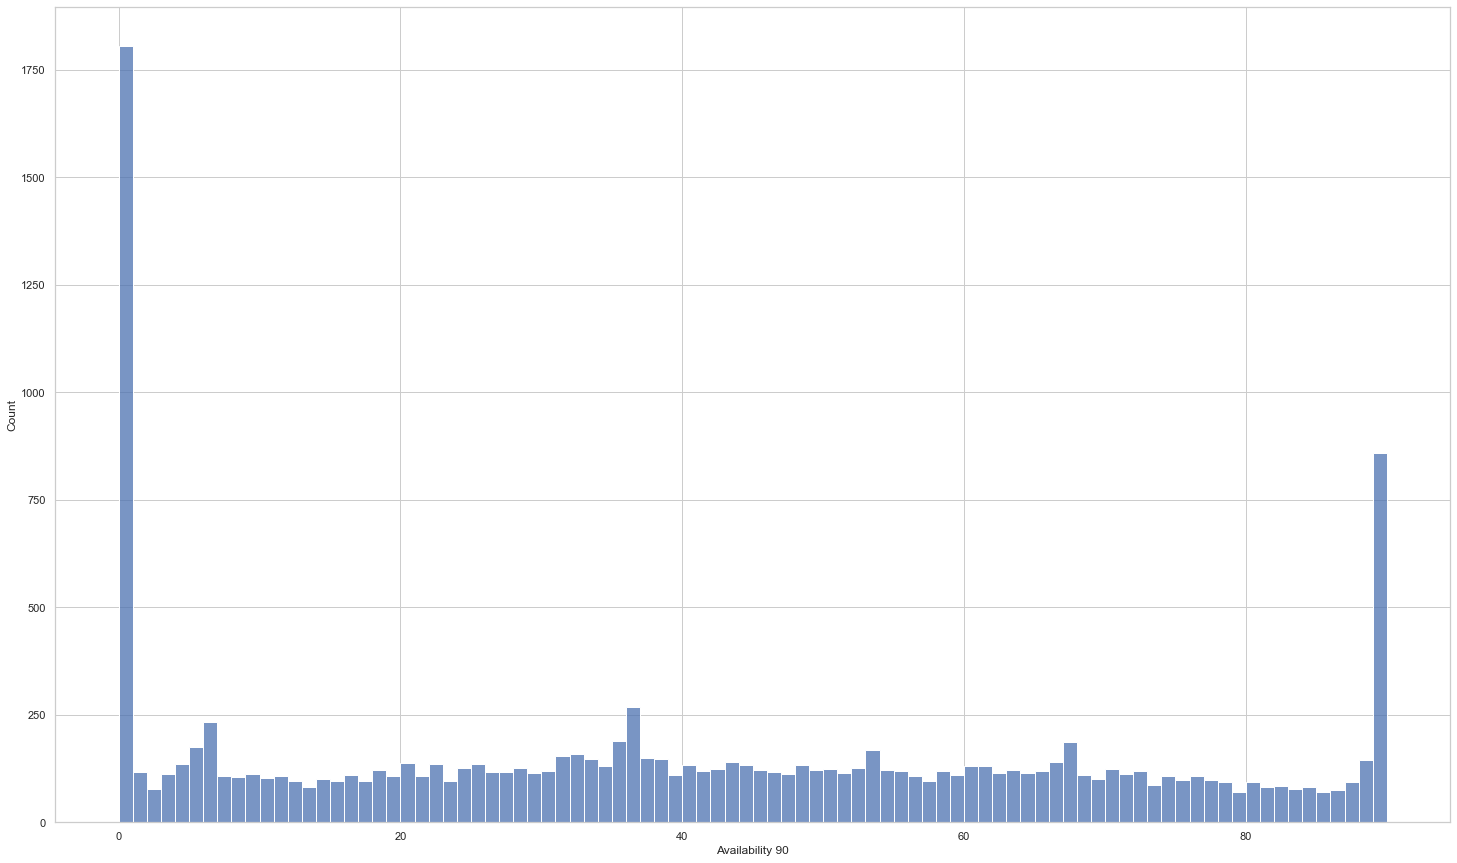

In [203]:
sns.histplot(data=df_madrid, x='Availability 90', binwidth=1)
plt.show()

### Availabilitu 365

In [204]:
df_madrid['Availability 365'].describe()

count    13207.000000
mean       205.442720
std        127.014245
min          0.000000
25%         83.000000
50%        247.000000
75%        321.000000
max        365.000000
Name: Availability 365, dtype: float64

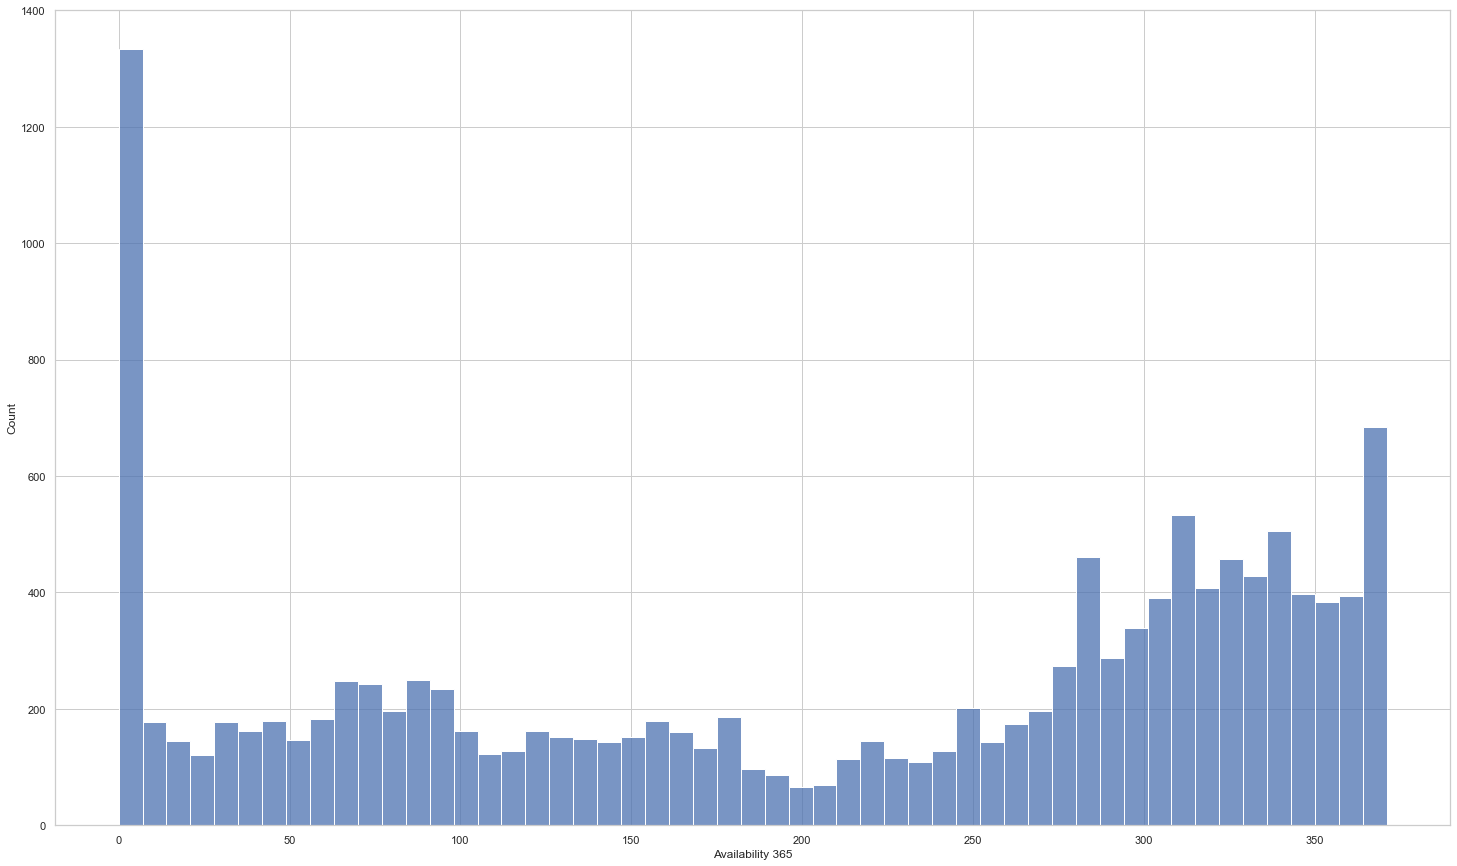

In [205]:
sns.histplot(data=df_madrid, x='Availability 365', binwidth=7)
plt.show()

**Elegir solo una de las 4 Availability porque si no puede haber problemas de colinearidad**

### Calendar last Scaped

In [206]:
df_madrid['Calendar last Scraped'].describe()

count          13207
unique             2
top       2017-04-08
freq            9612
Name: Calendar last Scraped, dtype: object

**drop**

### Number of Reviews

In [207]:
df_madrid['Number of Reviews'].describe()

count    13207.000000
mean        23.123571
std         38.485440
min          0.000000
25%          1.000000
50%          7.000000
75%         28.000000
max        446.000000
Name: Number of Reviews, dtype: float64

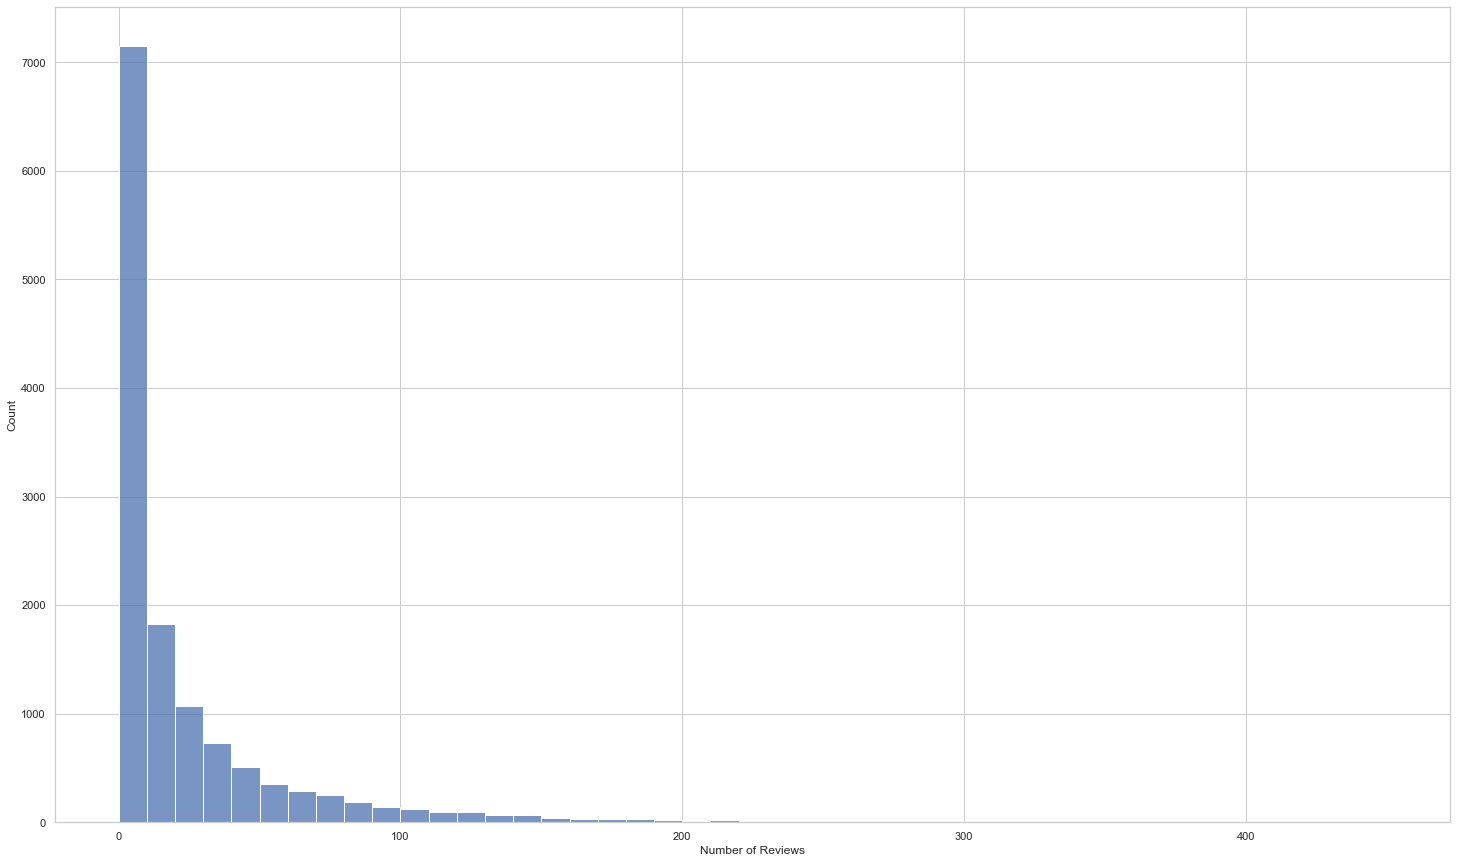

In [208]:
sns.histplot(data=df_madrid, x='Number of Reviews', binwidth=10)
plt.show()

### First Review

In [209]:
df_madrid['First Review'].describe()

count          10494
unique          1605
top       2016-10-09
freq              63
Name: First Review, dtype: object

In [210]:
df_madrid[['ID','First Review']].groupby(by=['First Review'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
First Review,
NaN,2713
2016-10-09,63
2016-09-11,60
2017-02-26,57
2017-02-19,54
...,...
2015-09-19,1
2013-07-31,1
2013-08-01,1


### Last Review

In [211]:
df_madrid['Last Review'].describe()

count          10493
unique           702
top       2017-04-02
freq             741
Name: Last Review, dtype: object

In [212]:
df_madrid[['ID','Last Review']].groupby(by=['Last Review'], dropna=False).count().sort_values(by='ID', ascending=False)

,ID
Last Review,
NaN,2714
2017-04-02,741
2017-03-26,480
2017-04-03,460
2017-03-19,346
...,...
2015-10-02,1
2015-09-24,1
2015-09-22,1


### Review Scores Rating

In [213]:
df_madrid['Review Scores Rating'].unique()

array([ 98.,  95.,  91.,  99.,  96.,  67.,  nan,  93.,  90.,  88., 100.,
        87.,  86.,  81.,  80.,  97.,  94.,  83.,  92.,  75.,  60.,  89.,
        85.,  20.,  82.,  73.,  84.,  78.,  68.,  70.,  47.,  40.,  79.,
        77.,  57.,  26.,  53.,  58.,  71.,  63.,  74.,  76.,  56.,  50.,
        65.,  72.,  66.,  62.,  69.,  55.,  30.,  33.,  52.,  64.,  49.])

In [214]:
df_madrid['Review Scores Rating'].describe()

count    10369.000000
mean        91.619346
std          8.994536
min         20.000000
25%         88.000000
50%         94.000000
75%         98.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [215]:
df_madrid[['ID','Review Scores Rating']].groupby(by=['Review Scores Rating'Review Scores Rating''], dropna=False).count().sort_values(by='ID', ascending=False).head(10)

SyntaxError: invalid syntax (3147173358.py, line 1)

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Rating', binwidth=1)
plt.show()

### Review Scores Accuracy

In [ ]:
df_madrid[['ID','Review Scores Accuracy']].groupby(by=['Review Scores Accuracy'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
df_madrid['Review Scores Accuracy'].describe()

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Accuracy', binwidth=1)
plt.show()

### Review Scores Cleaningness

In [ ]:
df_madrid[['ID','Review Scores Cleanliness']].groupby(by=['Review Scores Cleanliness'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
df_madrid['Review Scores Cleanliness'].describe()

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Cleanliness', binwidth=1)
plt.show()

### Review Scores Checkin

In [ ]:
df_madrid[['ID','Review Scores Checkin']].groupby(by=['Review Scores Checkin'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
df_madrid['Review Scores Checkin'].describe()

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Checkin', binwidth=1)
plt.show()

### Review Scores Communication

In [ ]:
df_madrid['Review Scores Communication'].describe()

In [ ]:
df_madrid[['ID','Review Scores Communication']].groupby(by=['Review Scores Communication'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Communication', binwidth=1)
plt.show()

### Review Scores Location

In [ ]:
df_madrid['Review Scores Location'].describe()

In [ ]:
df_madrid[['ID','Review Scores Location']].groupby(by=['Review Scores Location'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Location', binwidth=1)
plt.show()

### Review Scores Value 

In [ ]:
df_madrid['Review Scores Value'].describe()

In [ ]:
df_madrid[['ID','Review Scores Value']].groupby(by=['Review Scores Value'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
sns.histplot(data=df_madrid, x='Review Scores Value', binwidth=1)
plt.show()

### License

In [ ]:
df_madrid['License'].unique()

In [ ]:
df_madrid['License'].describe()

### Jurisdiction Names

In [ ]:
df_madrid['Jurisdiction Names'].describe()

In [ ]:
df_madrid['Jurisdiction Names'].unique()

### Cancellation Policy

In [ ]:
df_madrid['Cancellation Policy'].unique()

In [ ]:
df_madrid[['ID','Cancellation Policy']].groupby(by=['Cancellation Policy'], dropna=False).count().sort_values(by='ID', ascending=False)

In [ ]:
sns.boxplot(x='Cancellation Policy', y="Price", data=df_madrid)
plt.show()

**reconvertir a solo 3 categorias: strict, flexible y moderate**

### Calculated host listings count 

In [ ]:
df_madrid['Calculated host listings count'].describe()

In [ ]:
sns.histplot(data=df_madrid, x='Calculated host listings count', binwidth=1)
plt.show()

In [ ]:
sns.histplot(data=df_madrid[df_madrid['Calculated host listings count']<31], x='Calculated host listings count', binwidth=1)
plt.show()

In [ ]:
sns.histplot(data=df_madrid[df_madrid['Calculated host listings count']<31], x='Calculated host listings count', binwidth=1, color='blue', alpha=0.5)
sns.histplot(data=df_madrid[df_madrid['Host Listings Count']<31], x='Host Listings Count', binwidth=1, color='red', alpha=0.5)

plt.show()

**Muy parecidas "Host Listing Count" y "Calculated host listings count"**

### Reviews per Month

In [ ]:
df_madrid['Reviews per Month'].unique()

In [ ]:
df_madrid['Reviews per Month'].describe()

In [ ]:
sns.histplot(data=df_madrid, x='Reviews per Month', binwidth=0.2)
plt.show()

### Geolocation

In [ ]:
df_madrid['Geolocation'].describe()

**par de latitud / longitud --> ya está en otras columnas**

### Features 

In [ ]:
df_madrid['Features'].describe()

In [ ]:
df_madrid['Features'].head(10)

In [ ]:
df_madrid['Features'].iloc[12]

In [ ]:
df_madrid[['ID','Features']].groupby(by=['Features'], dropna=False).count().sort_values(by='ID', ascending=False)

**Listado de Caracteristicas, posible para feature engineering**